In [1]:
import pandas as pd
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt

# Manual Cleaning
Lihat sinyal satu persatu secara manual, catat sinyal yang jelek

c:\Python310\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


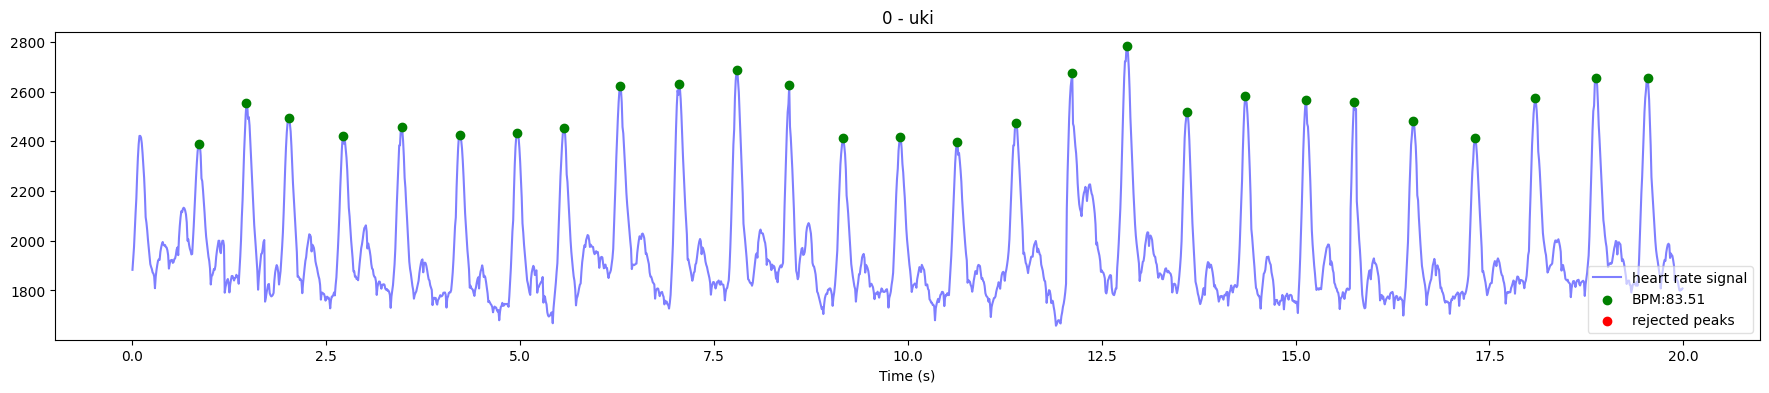

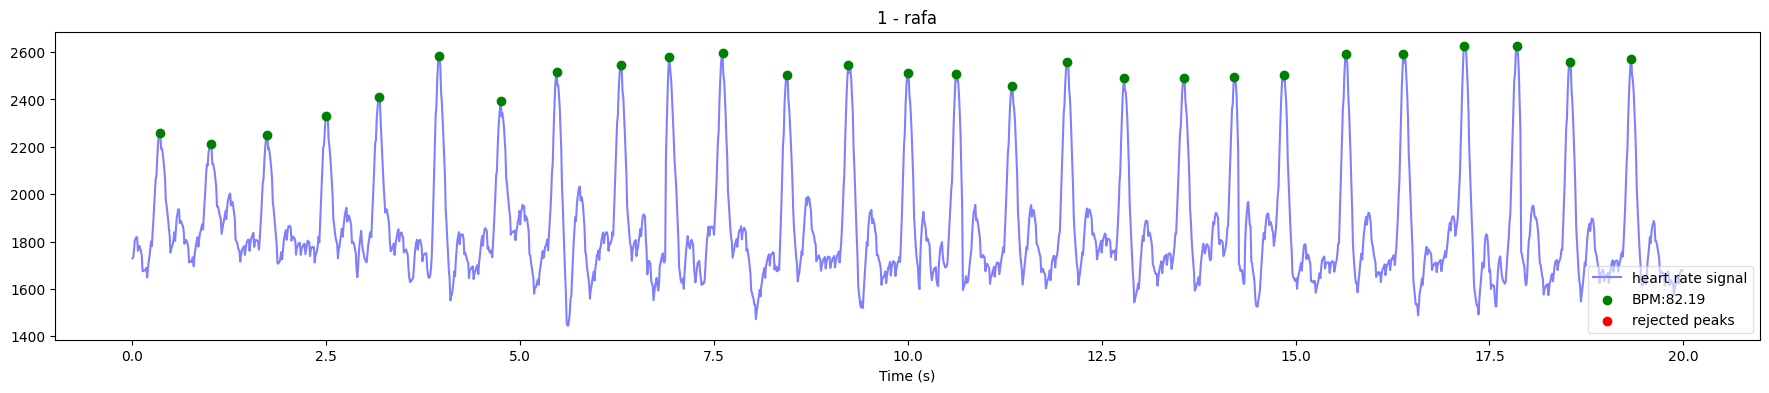

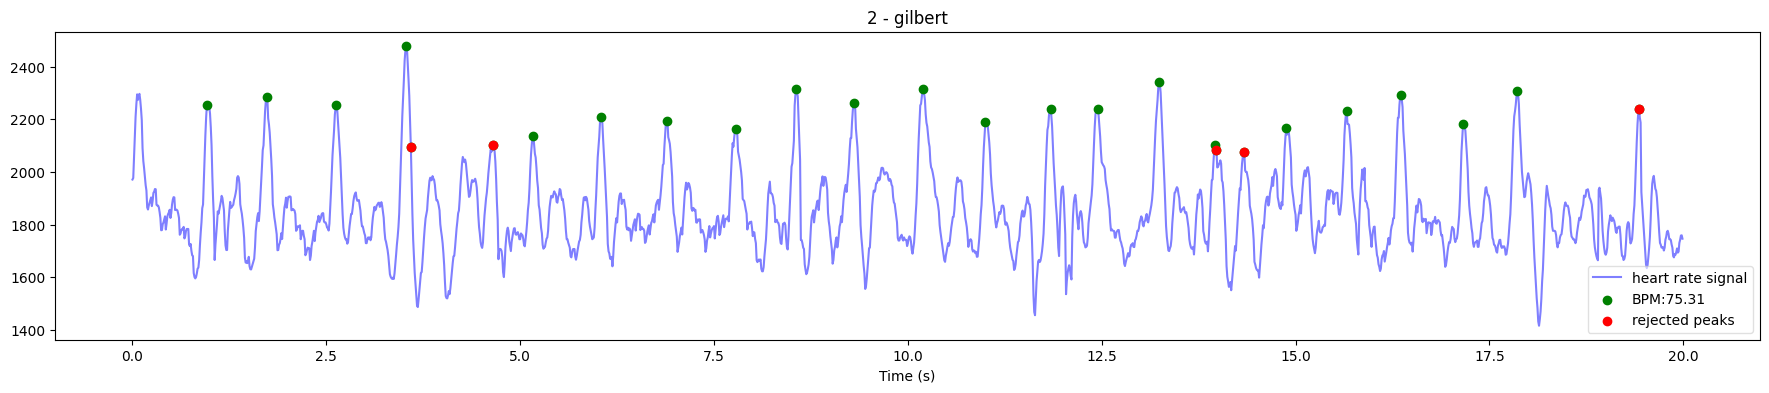

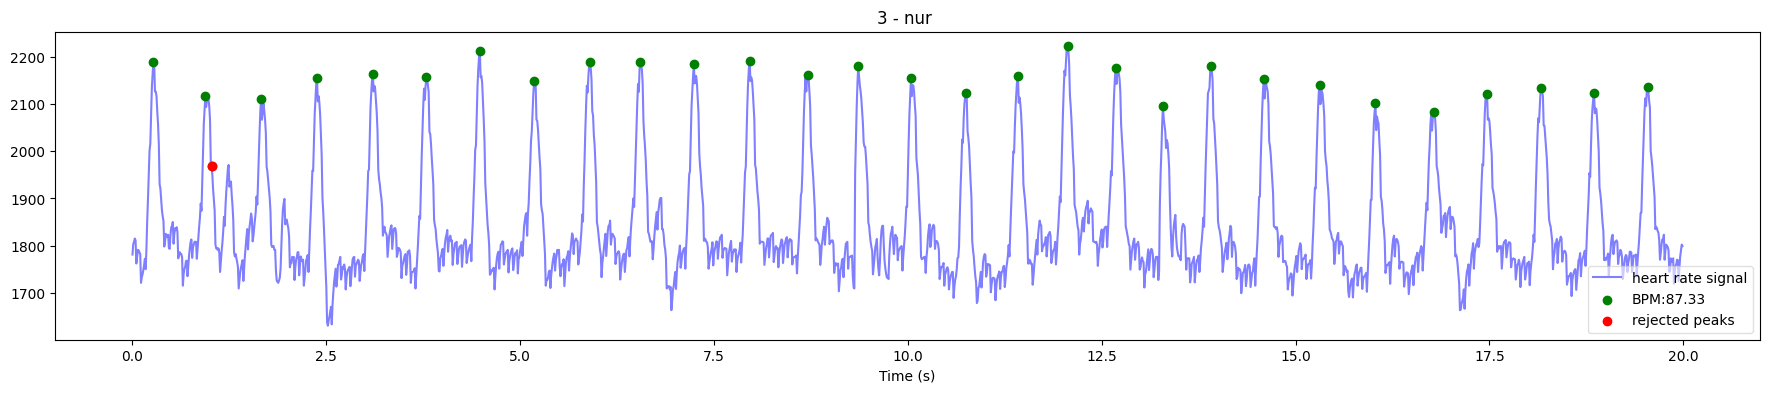

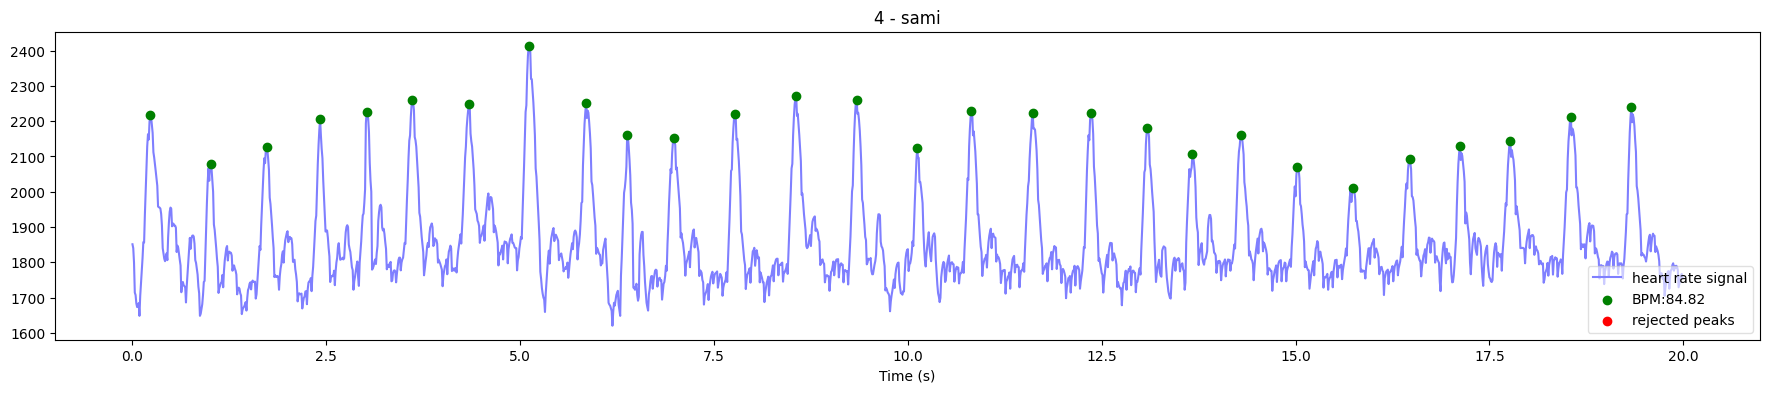

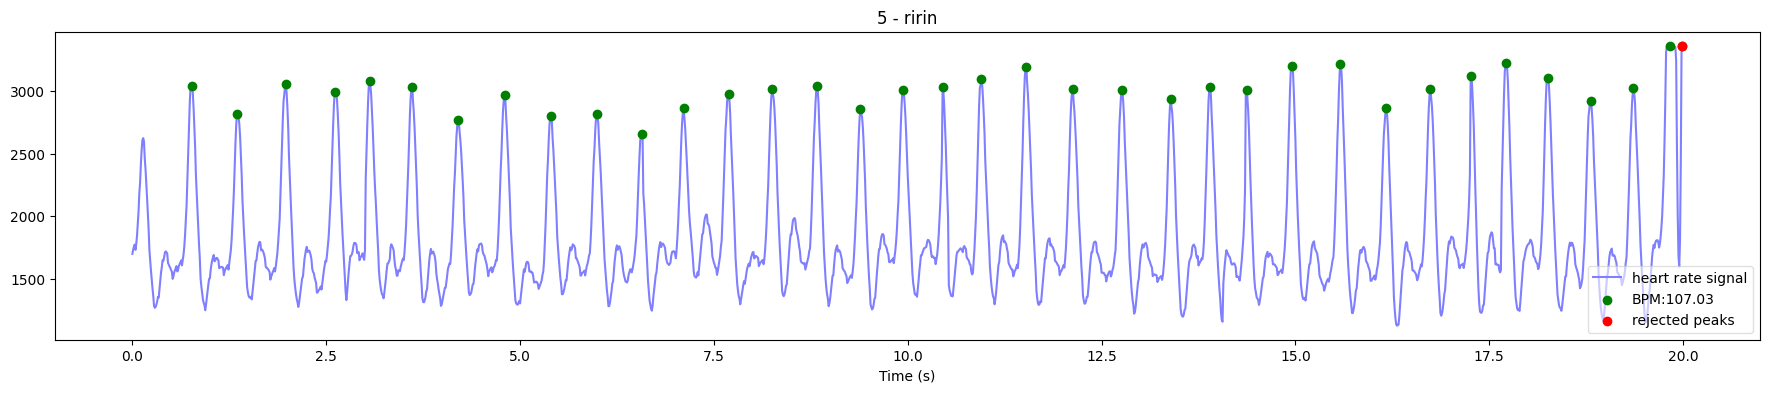

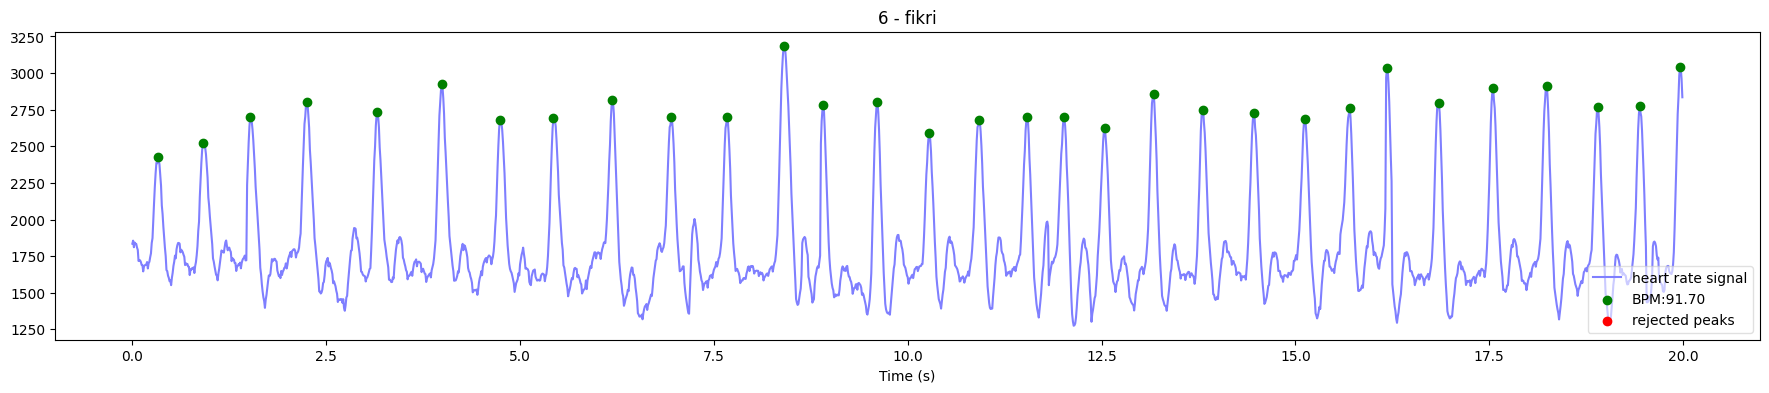

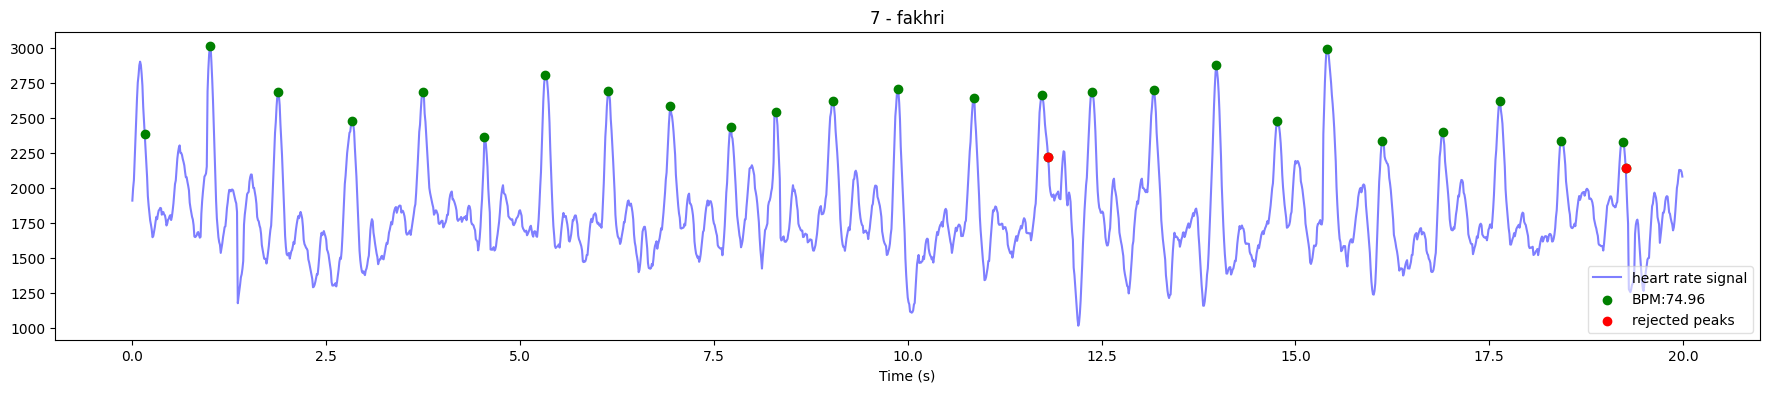

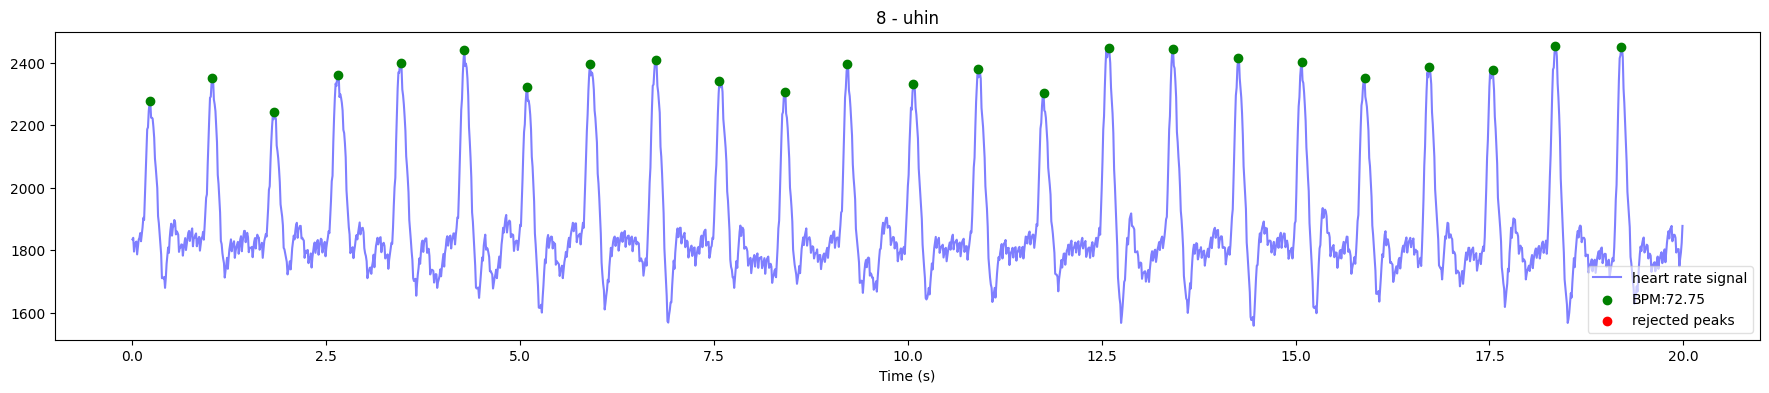

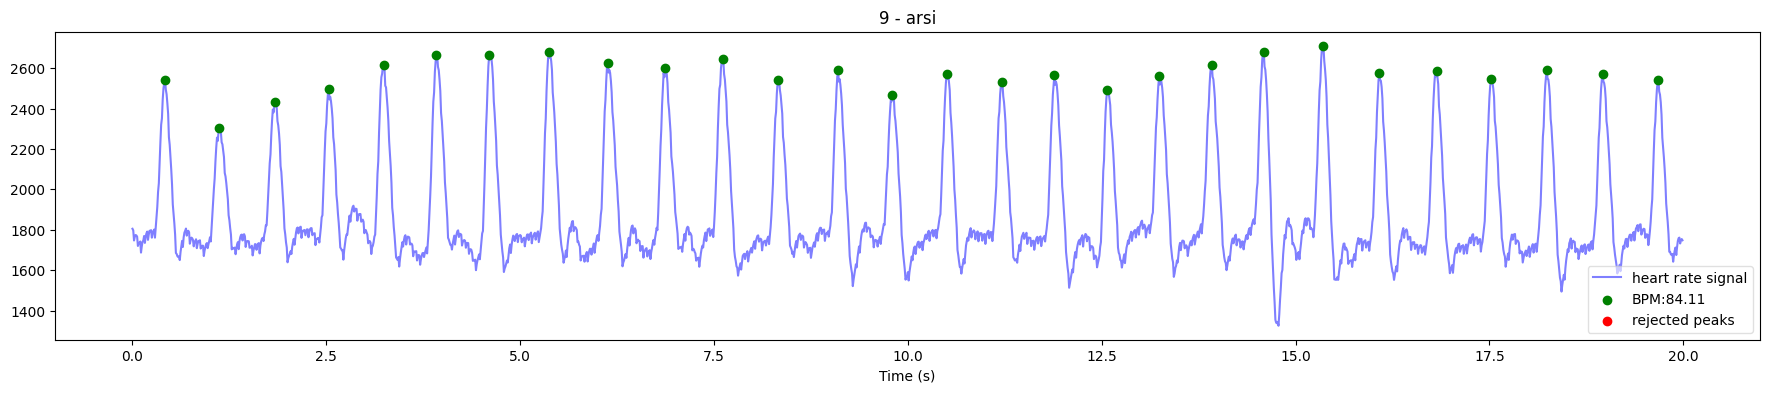

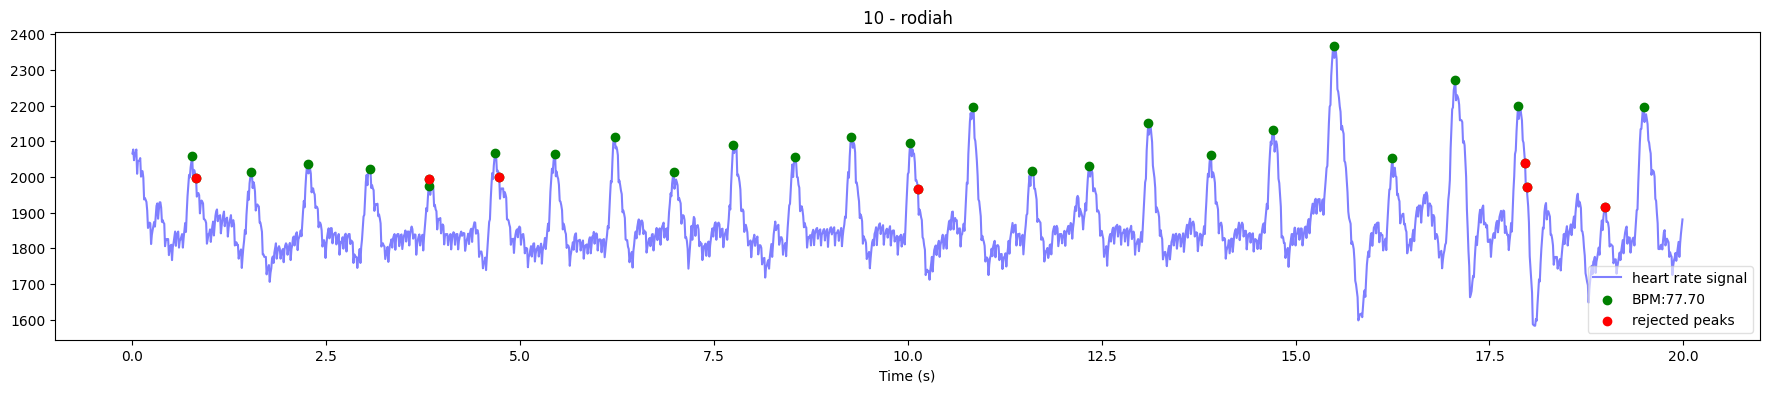

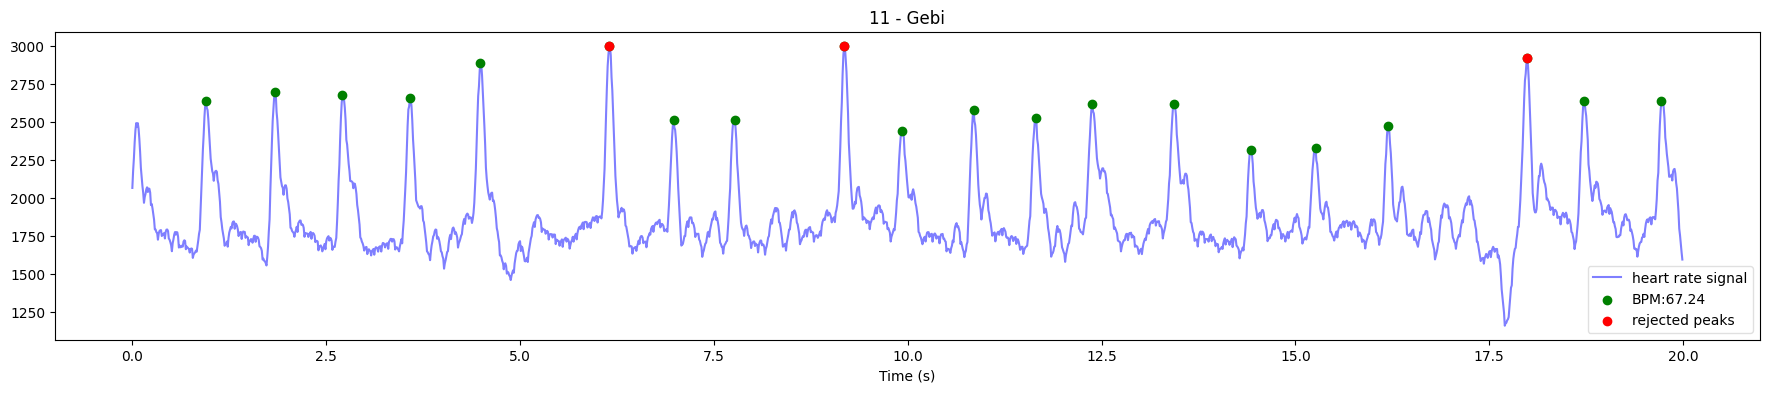

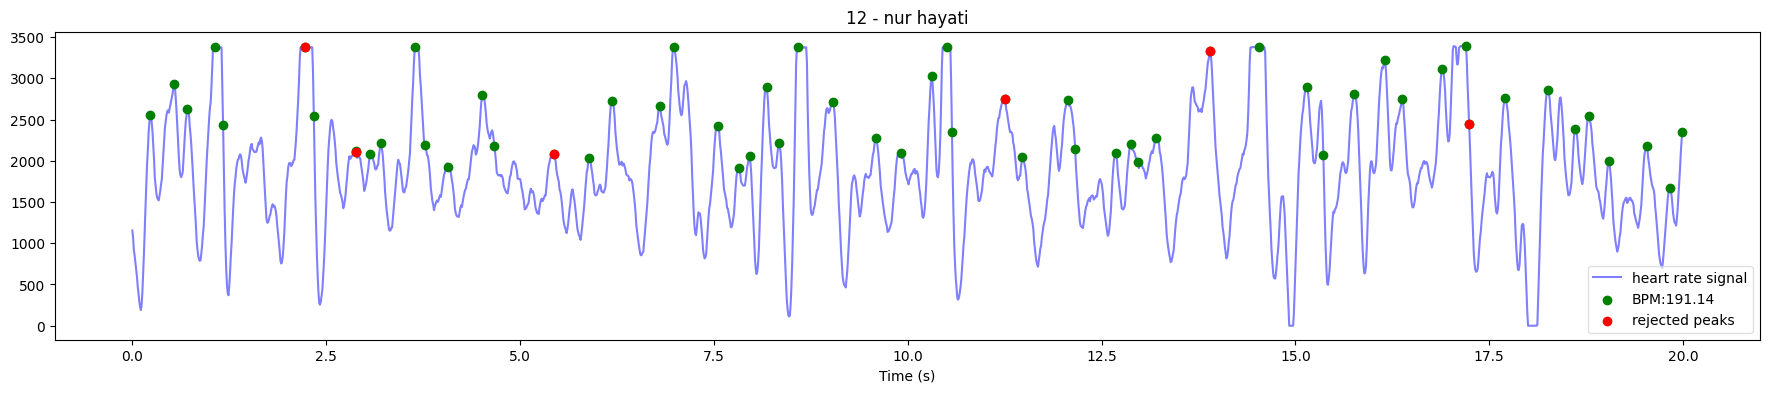

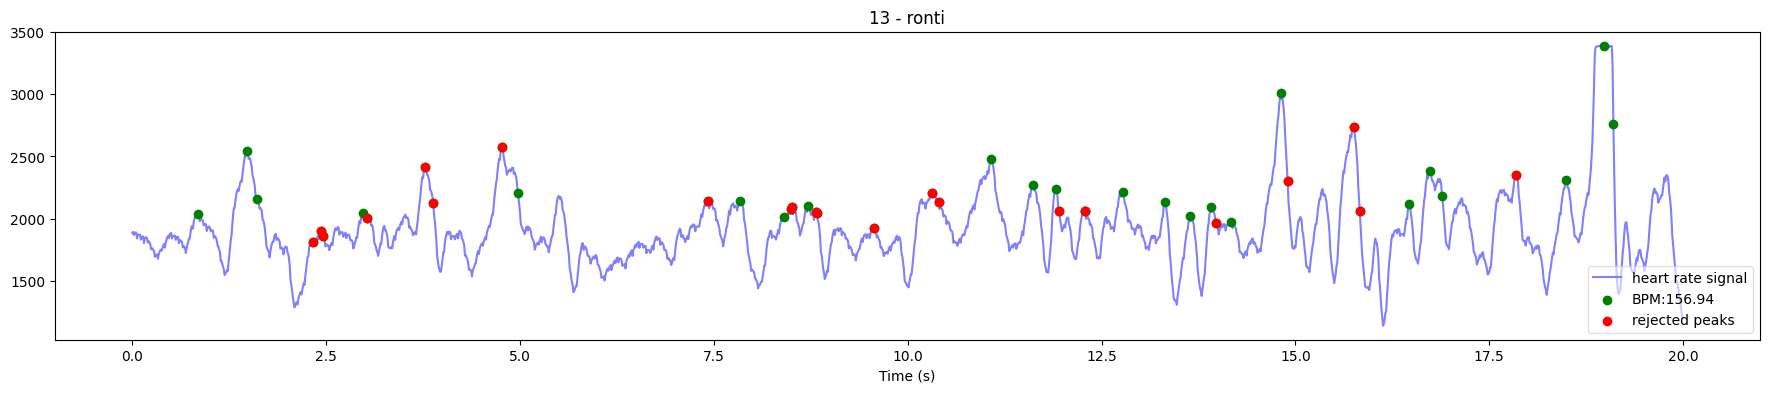

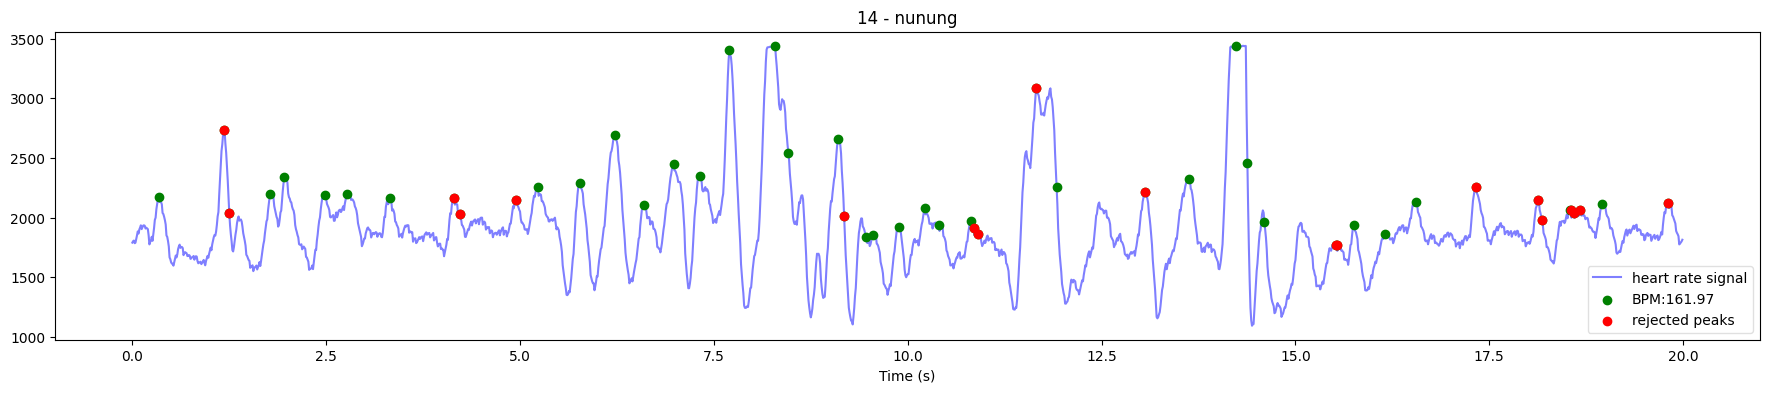

c:\Python310\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


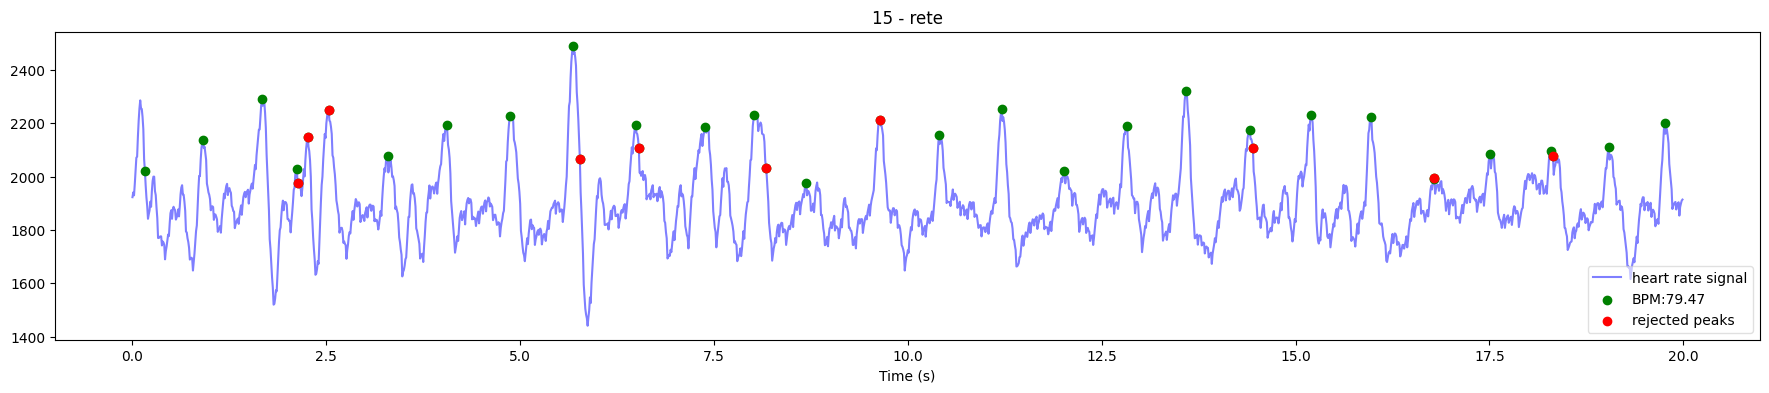

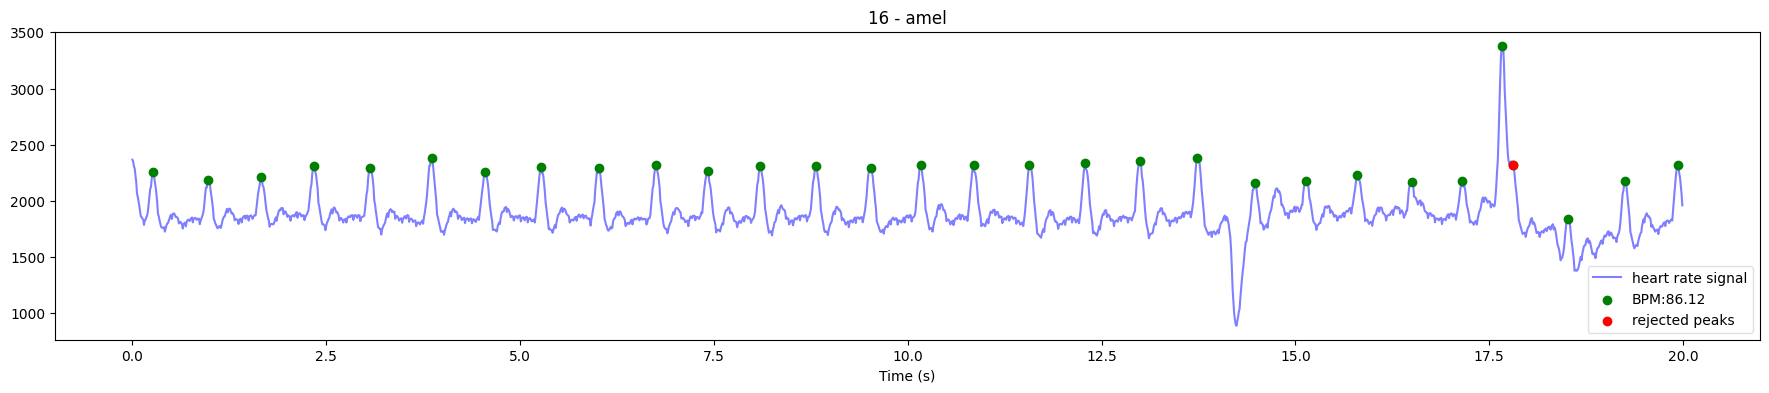

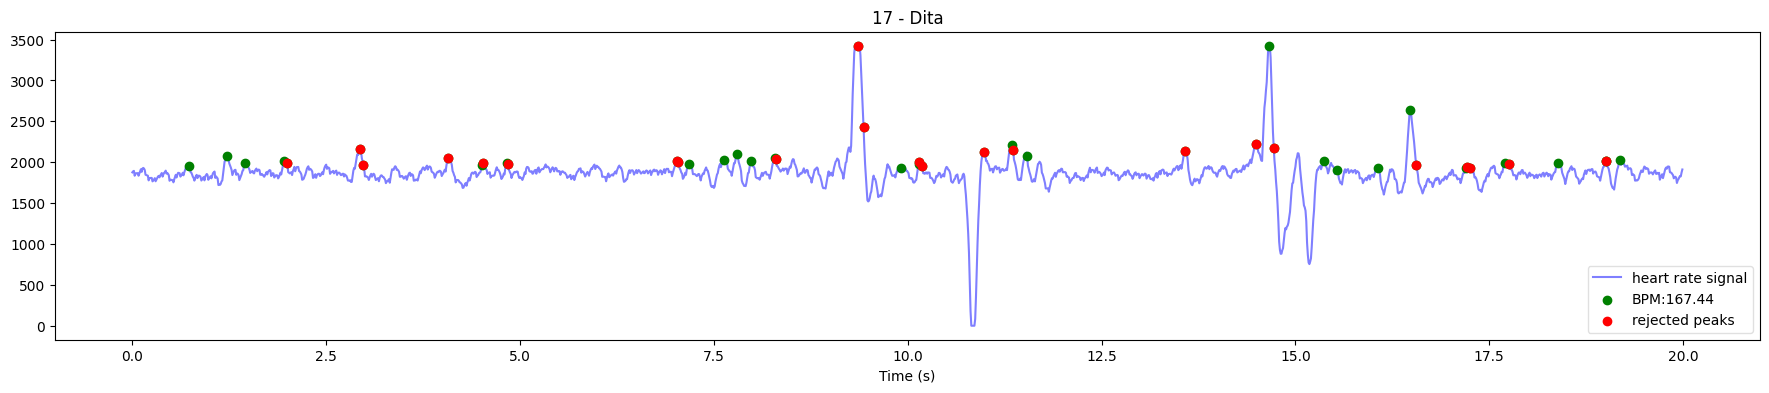

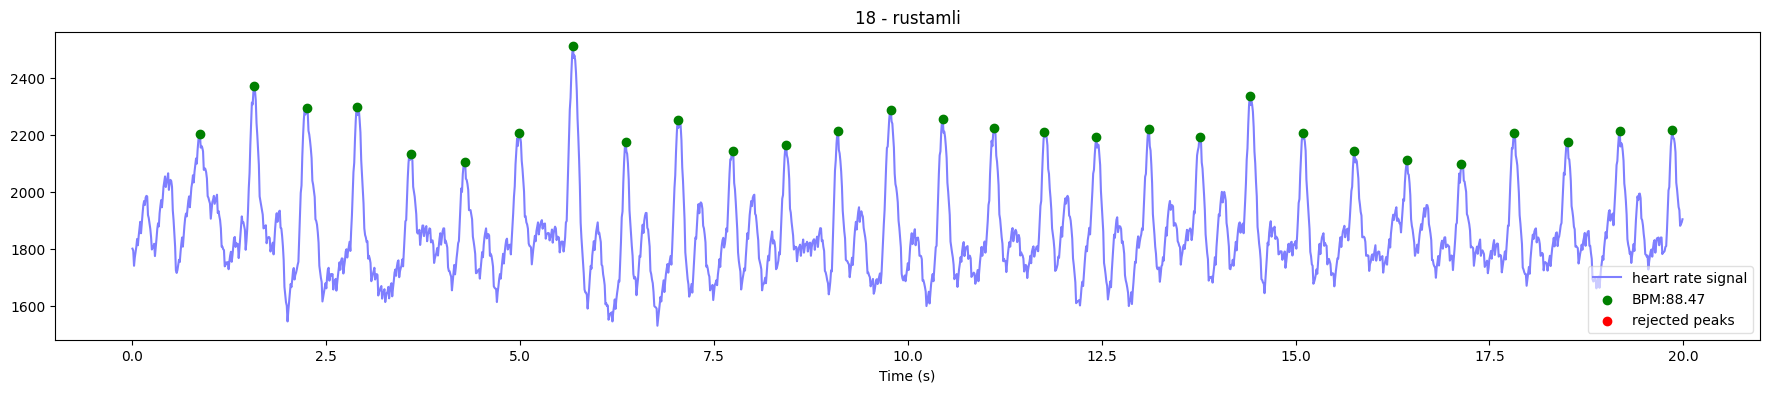

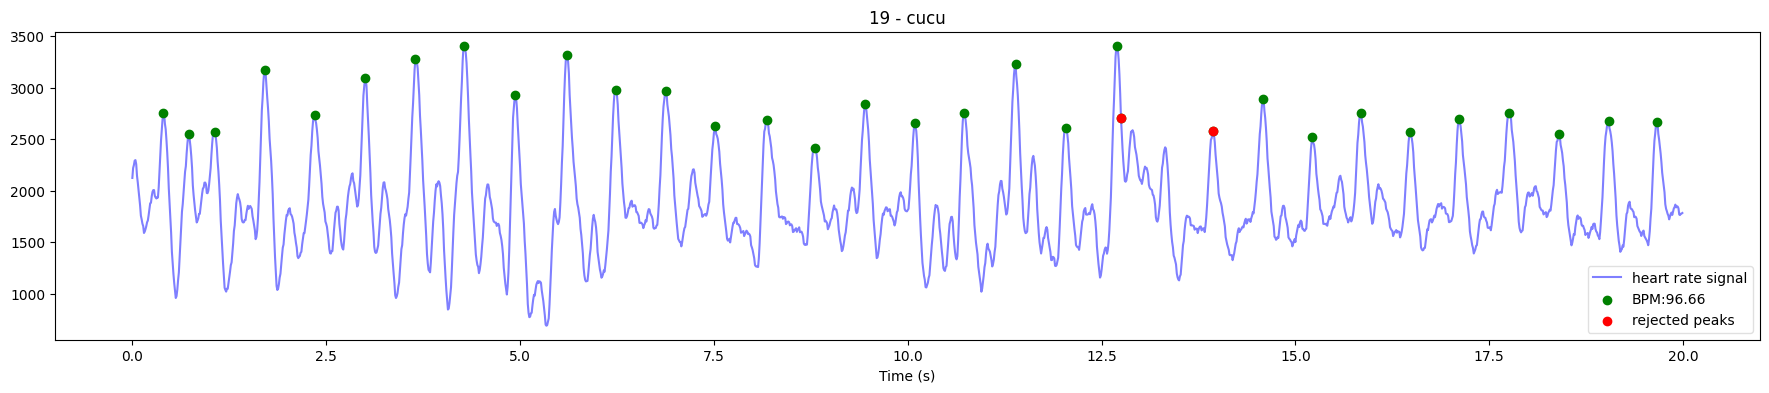

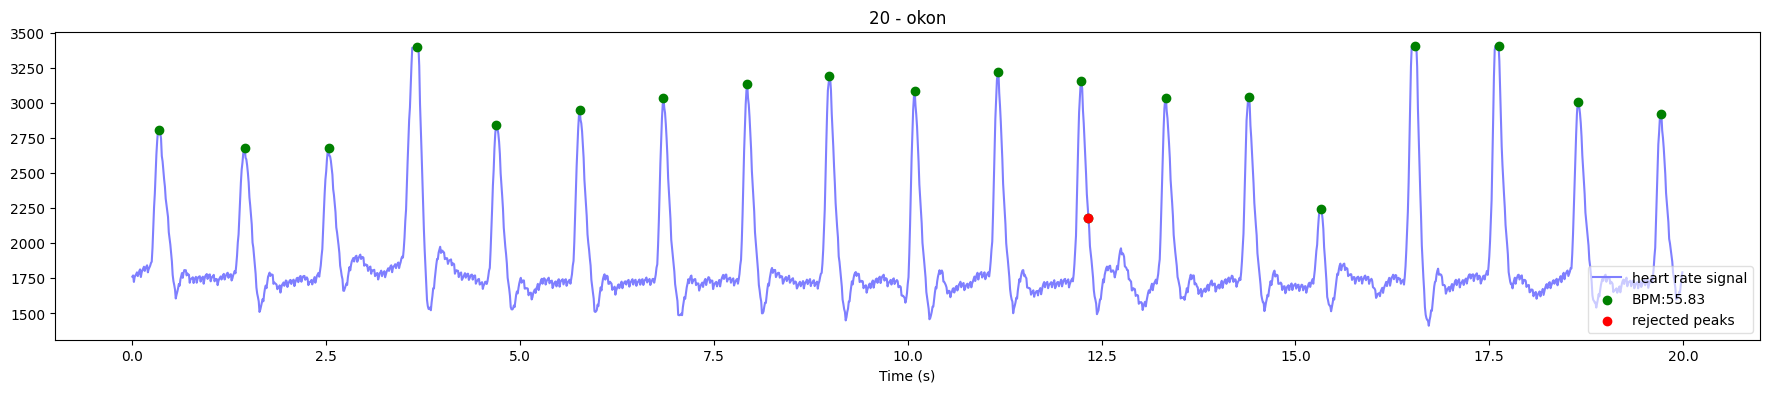

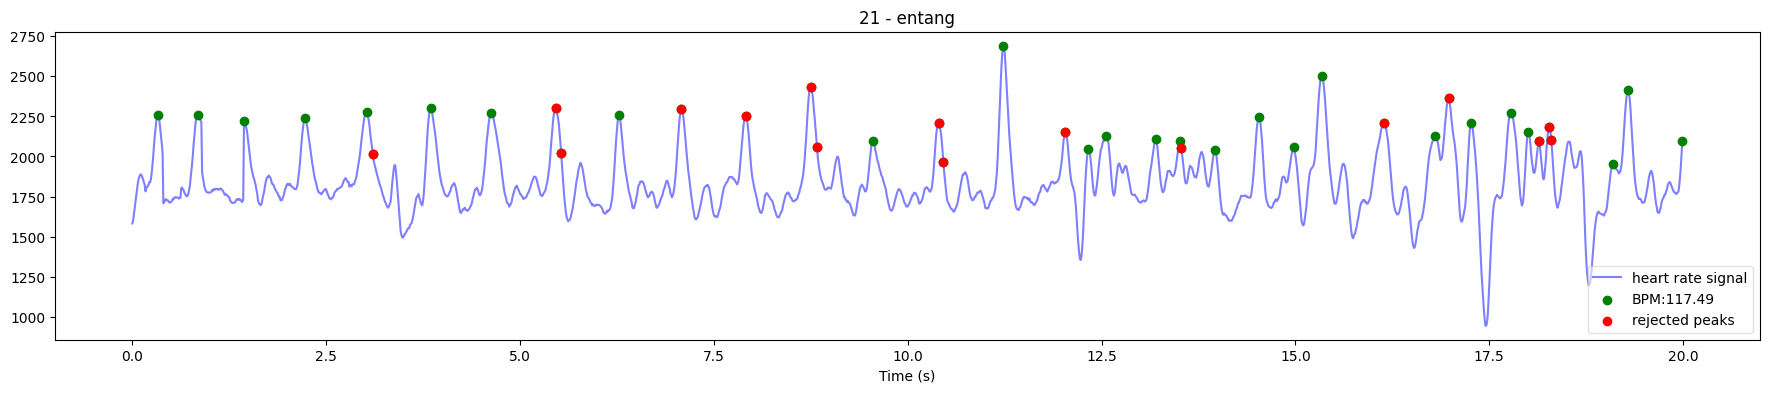

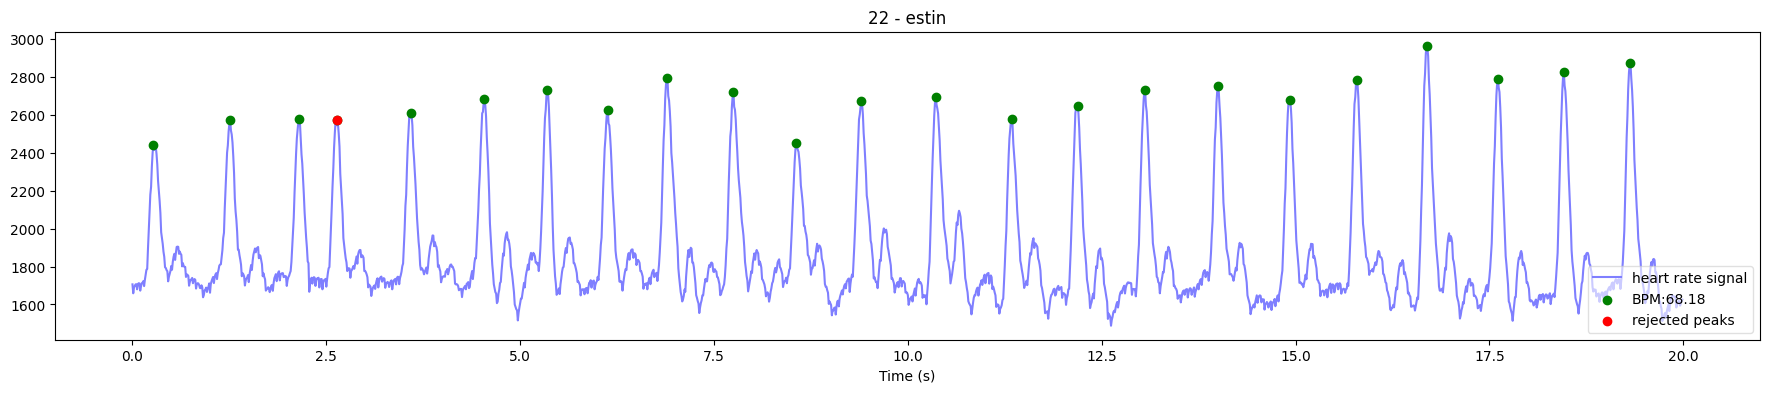

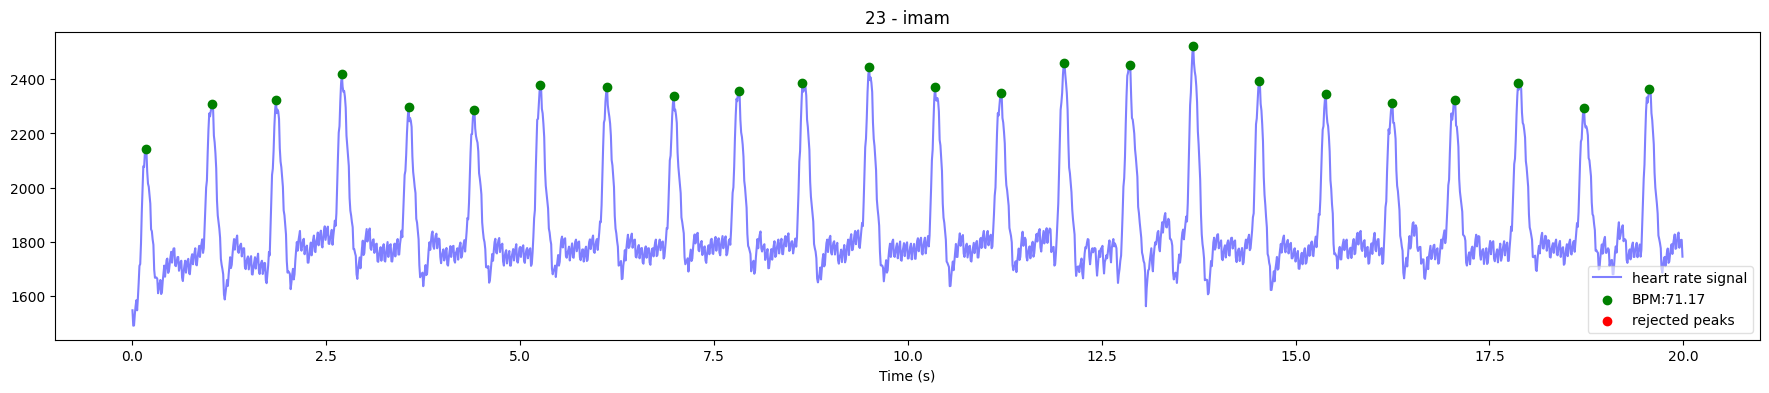

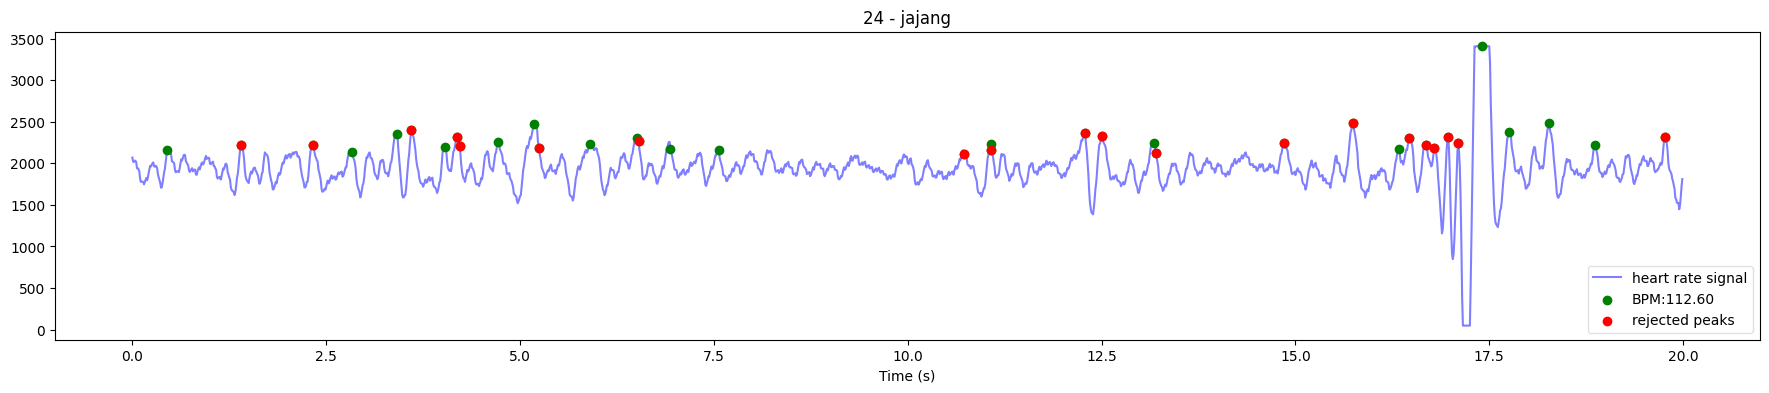

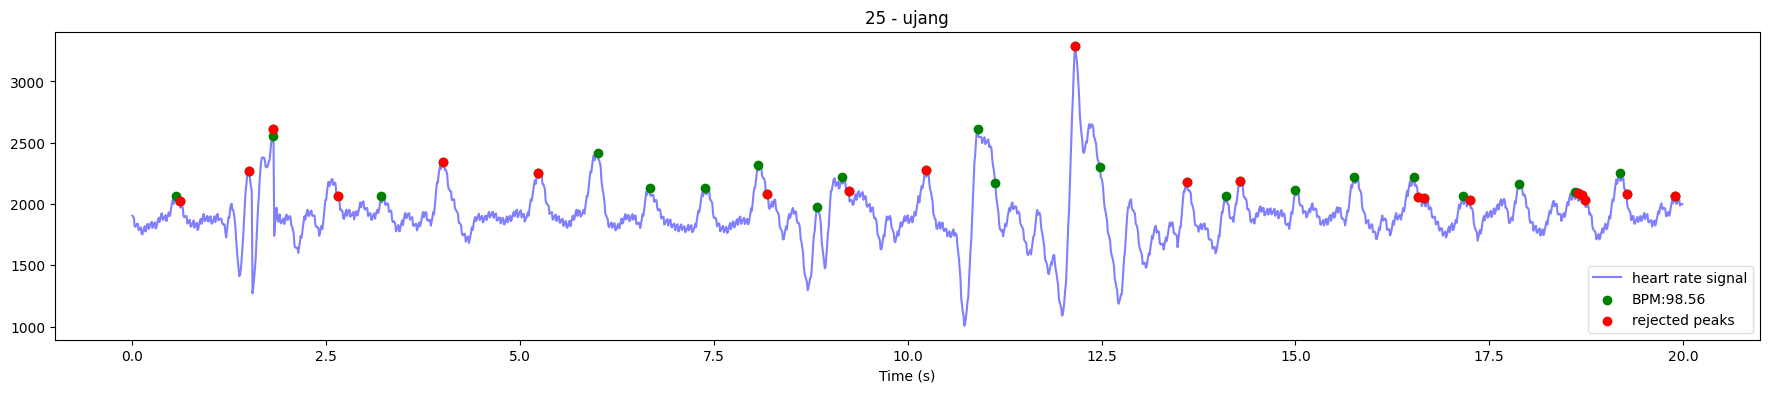

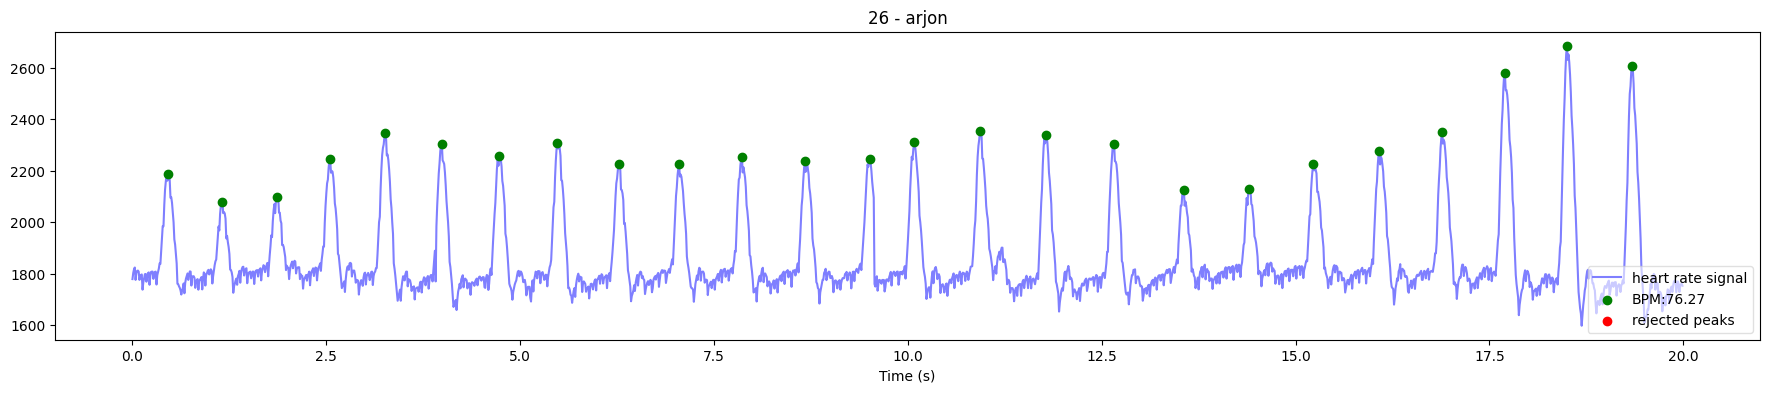

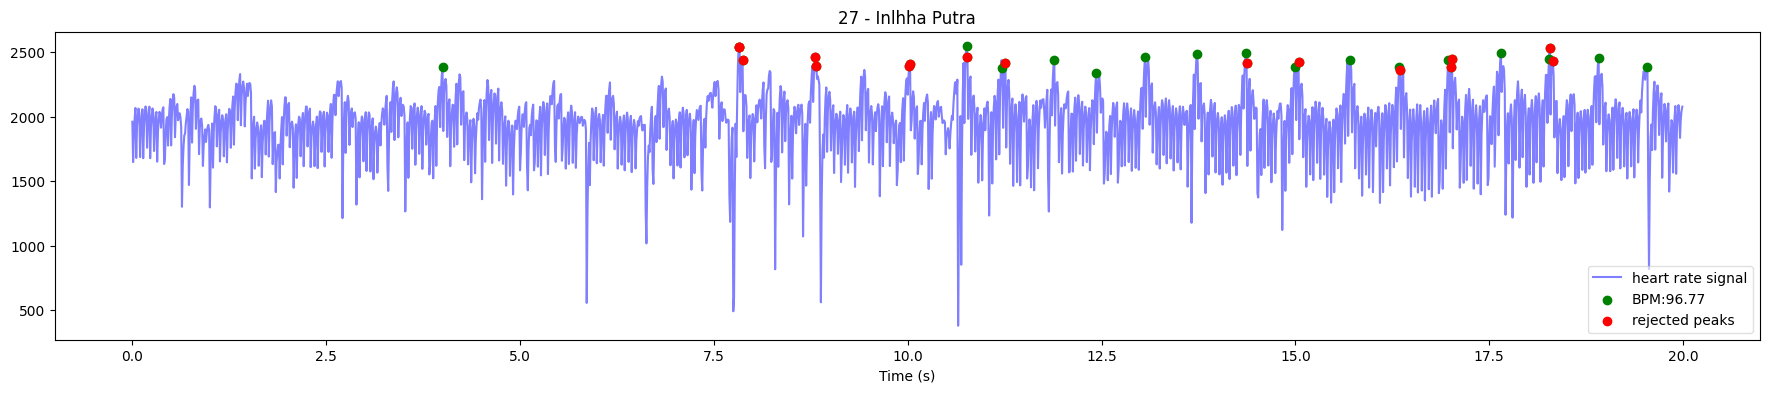

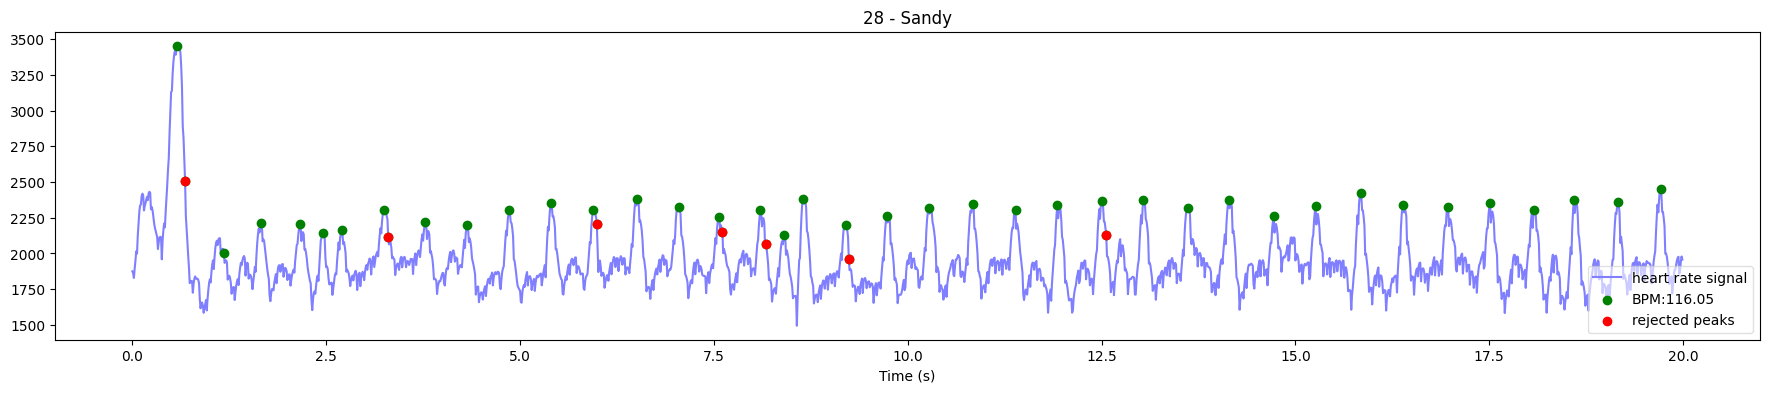

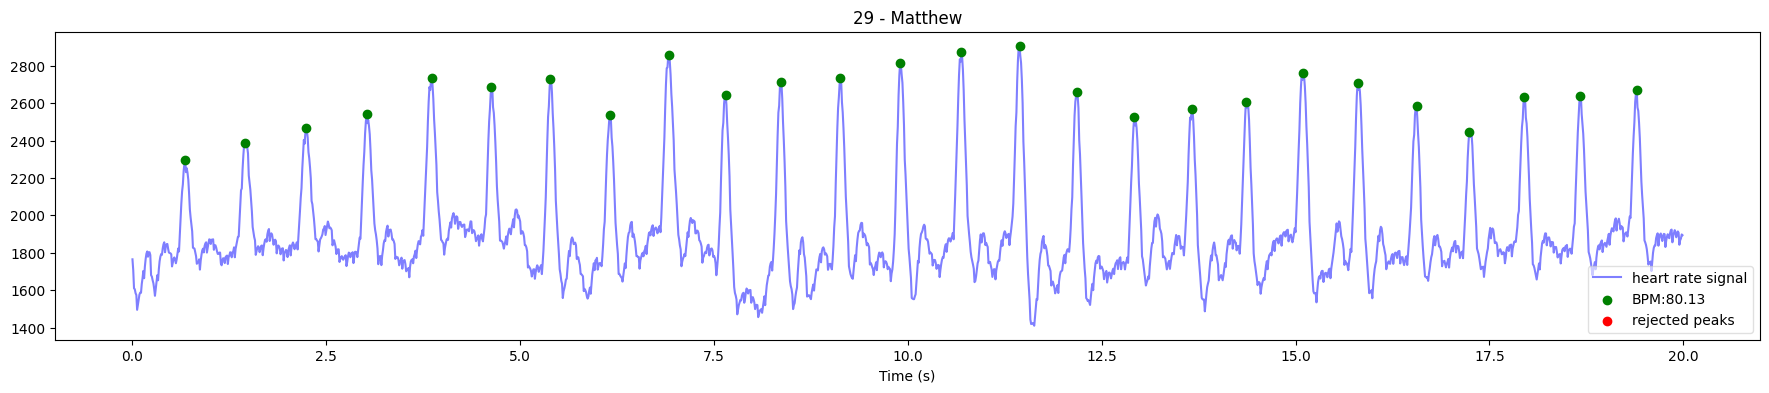

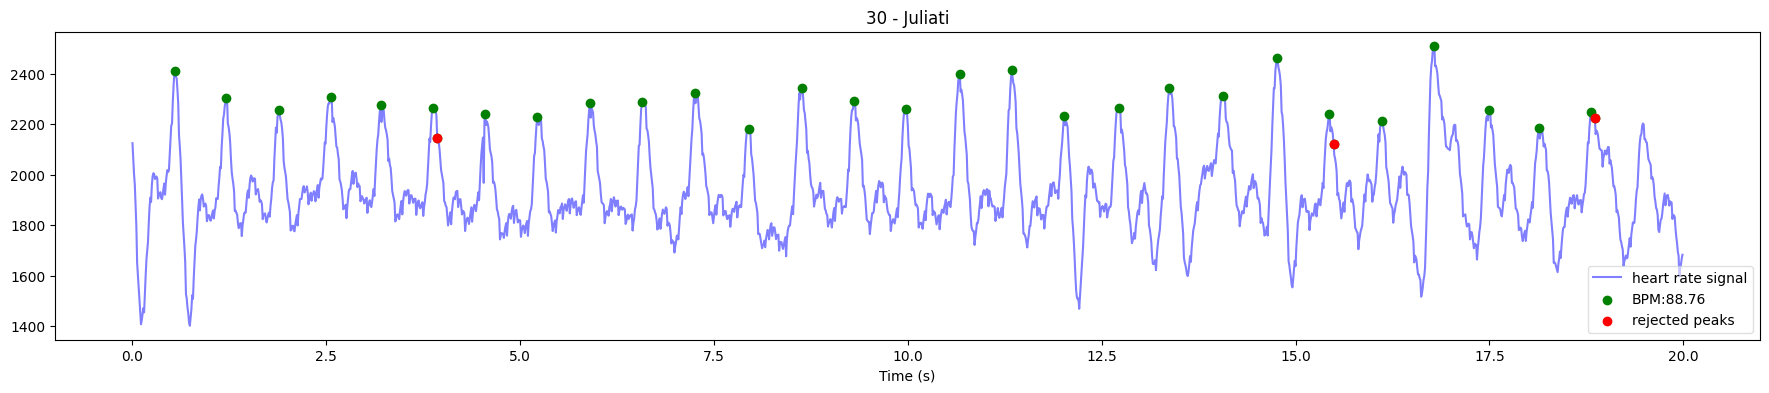

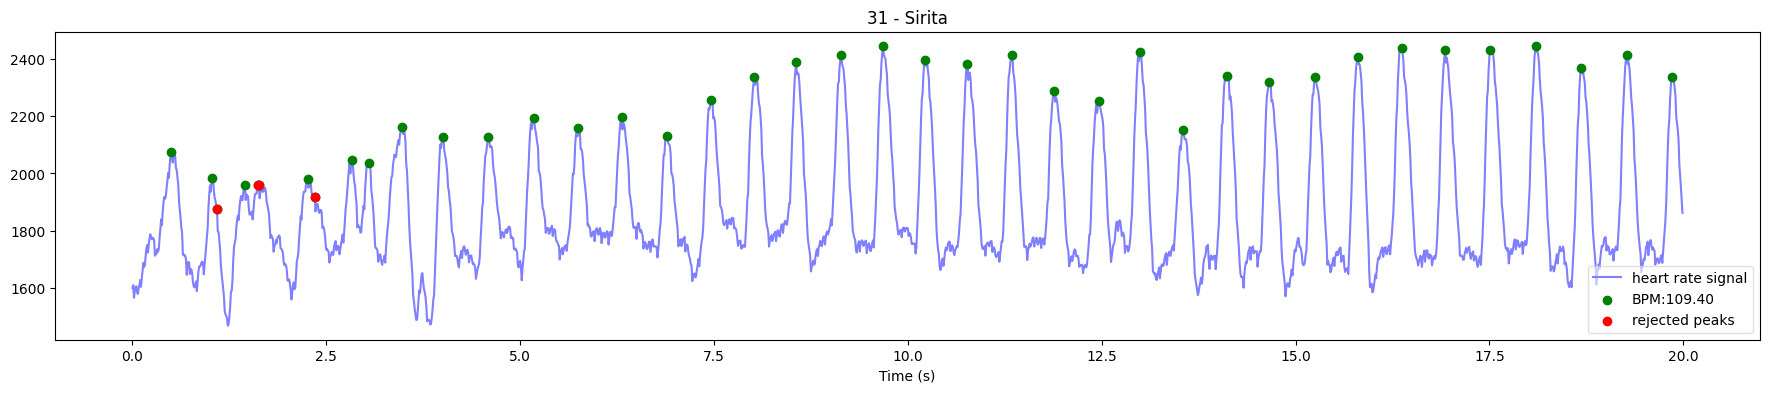

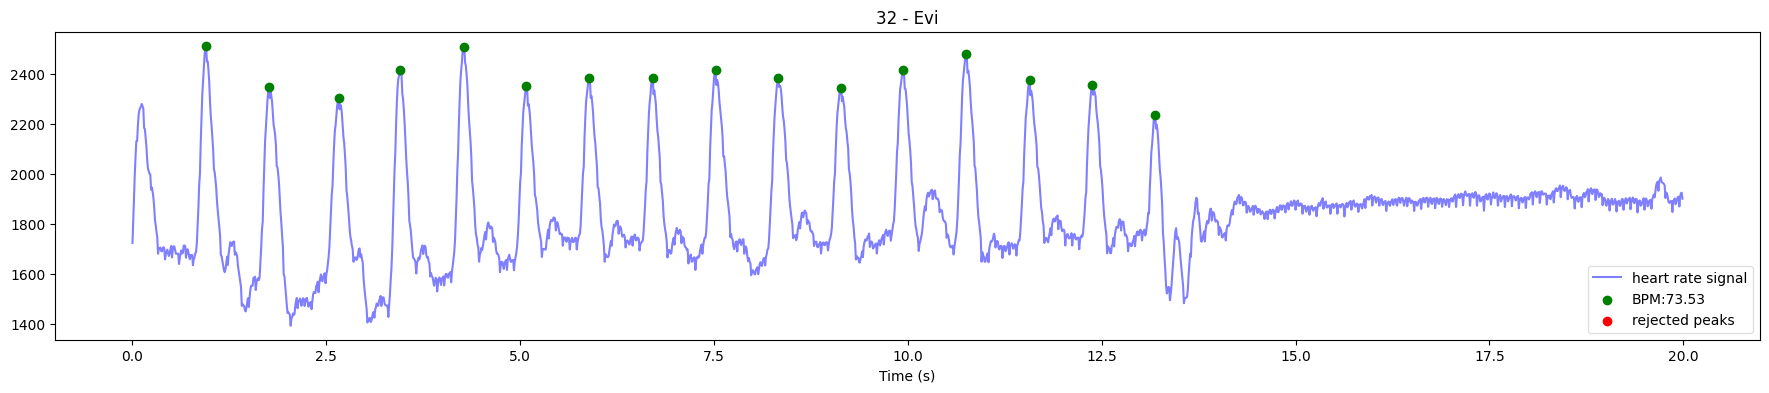

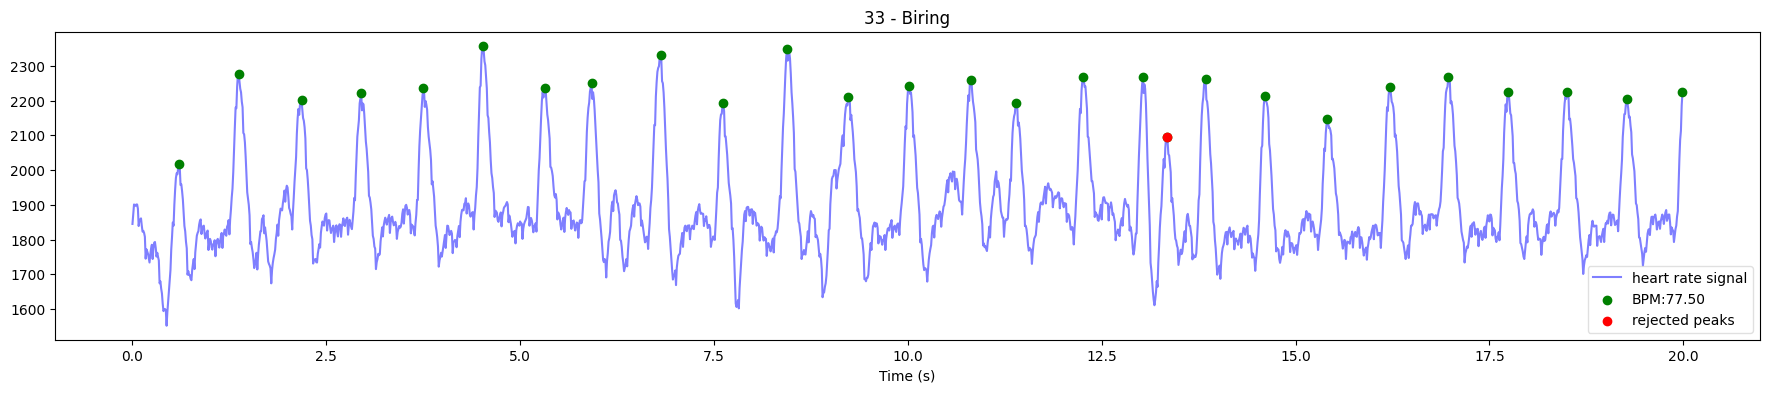

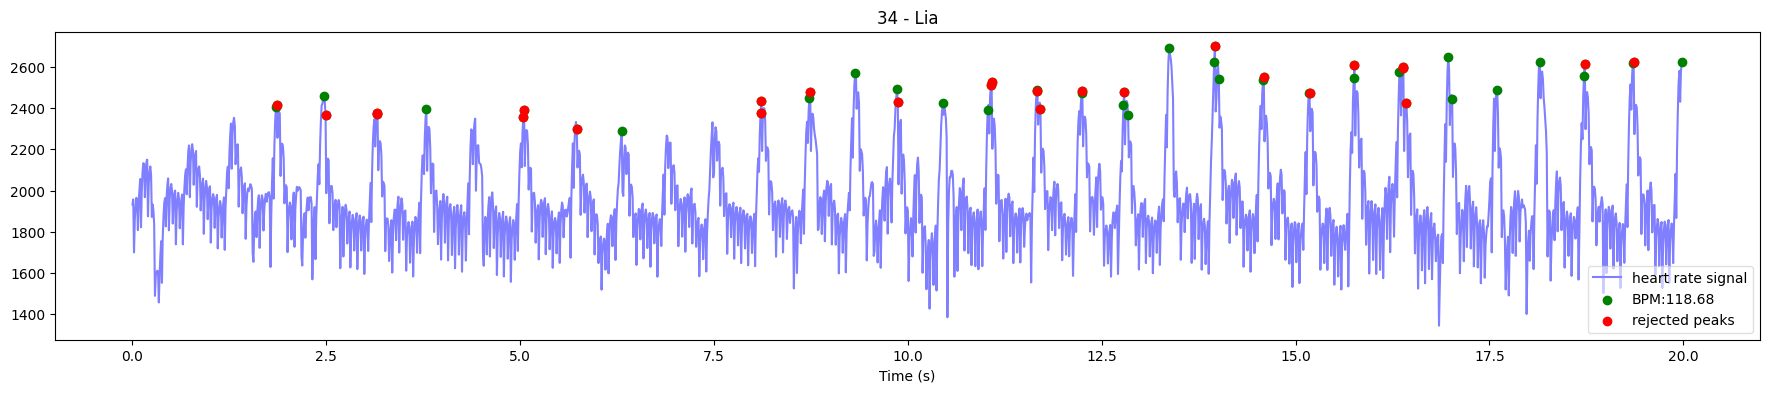

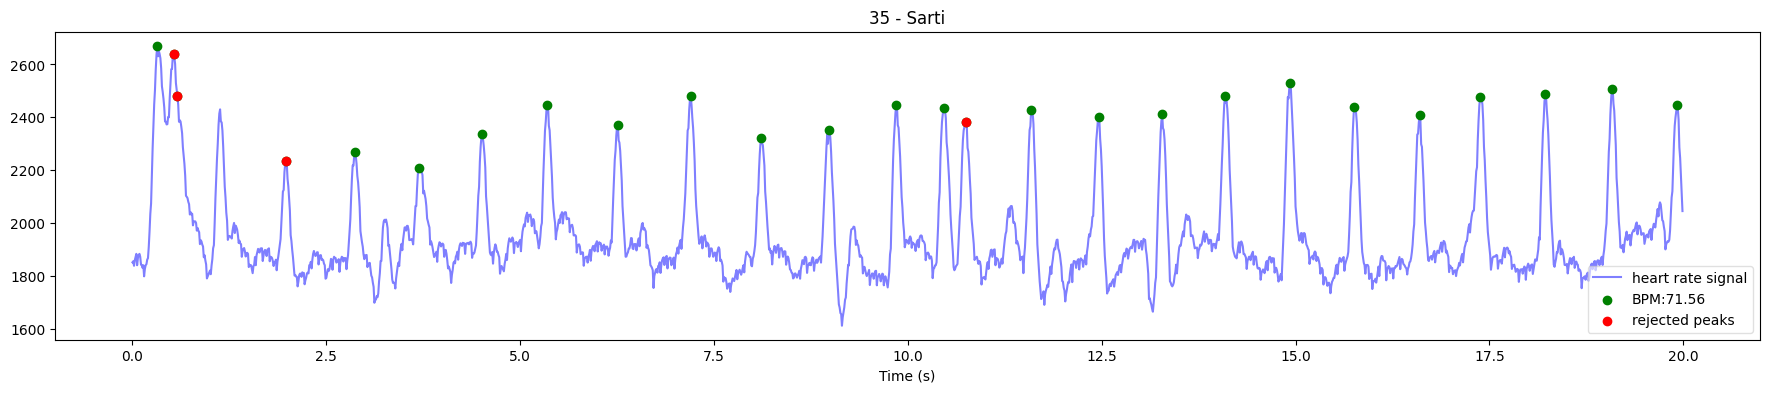

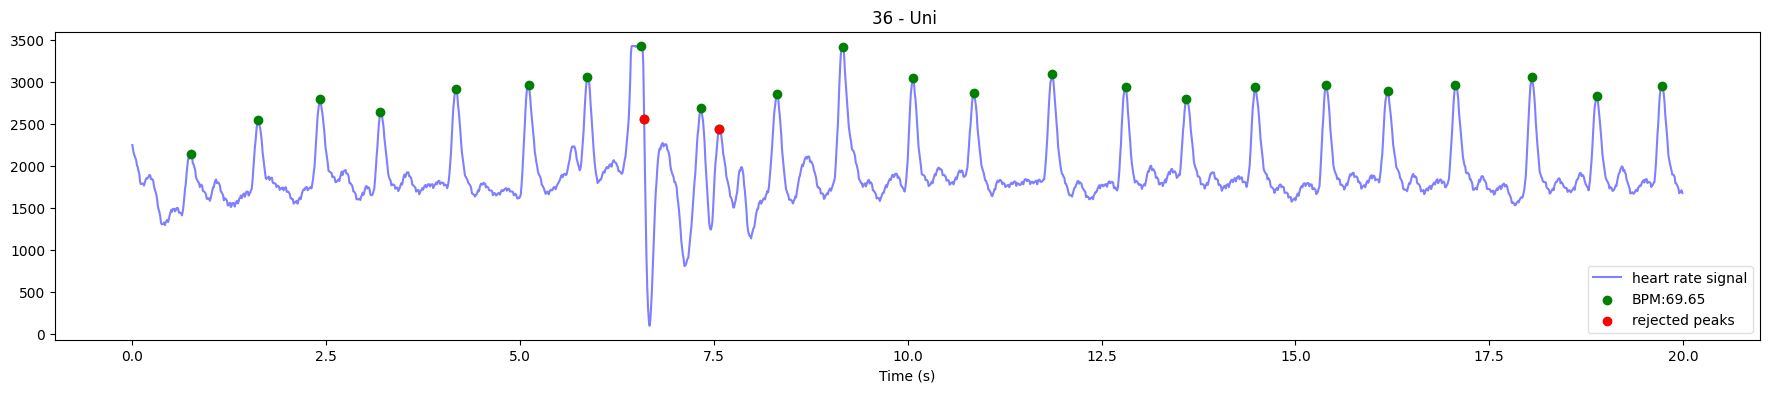

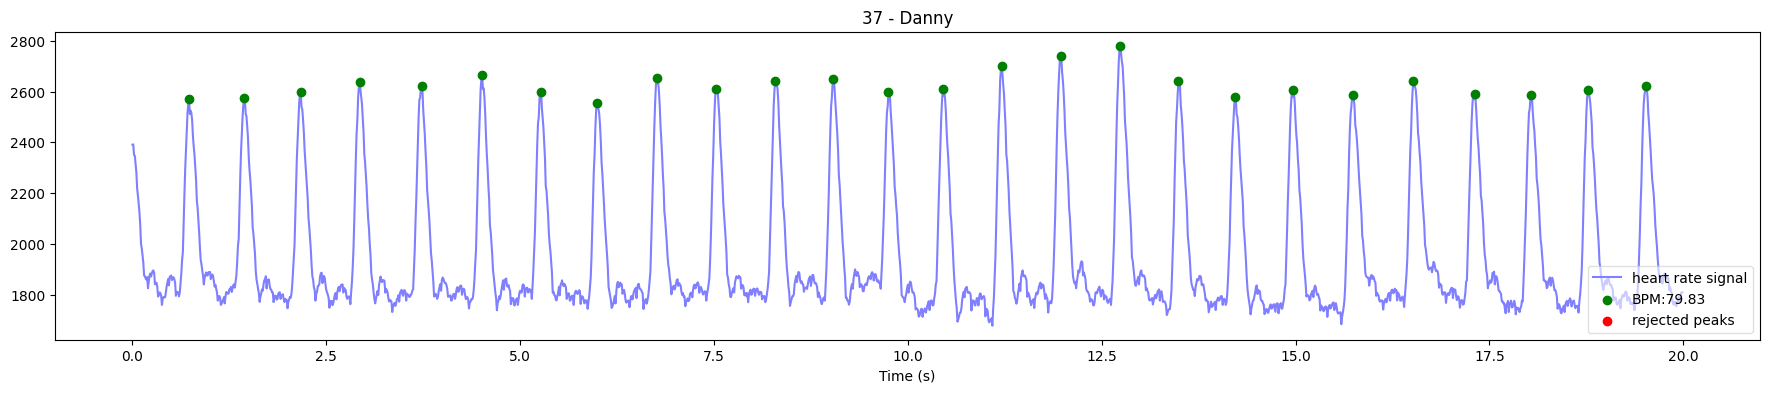

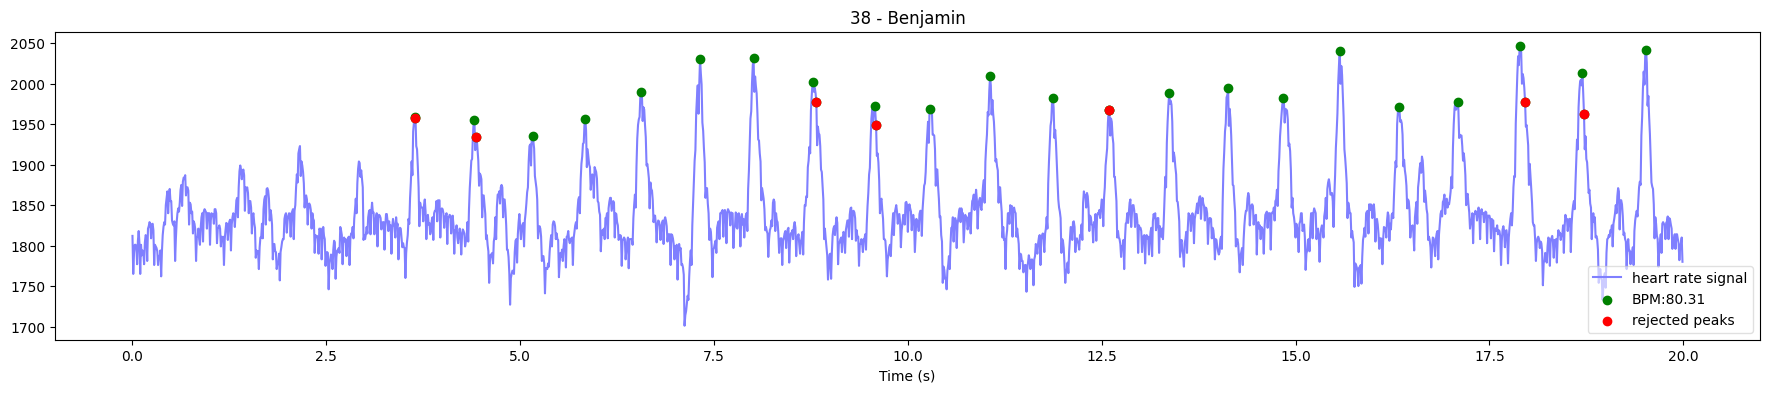

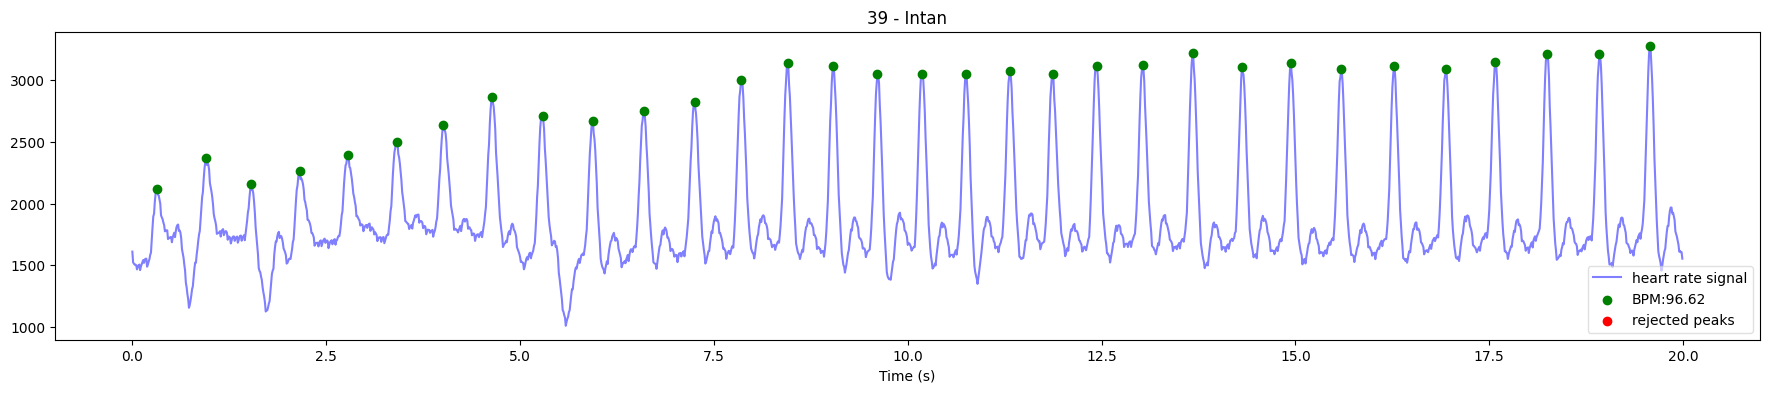

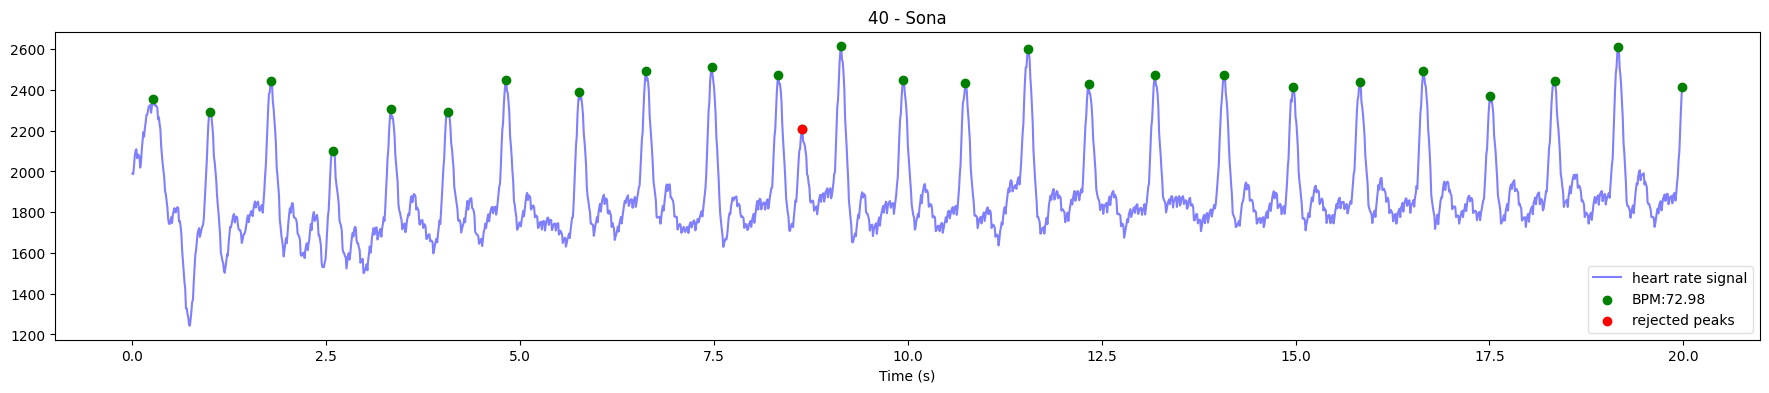

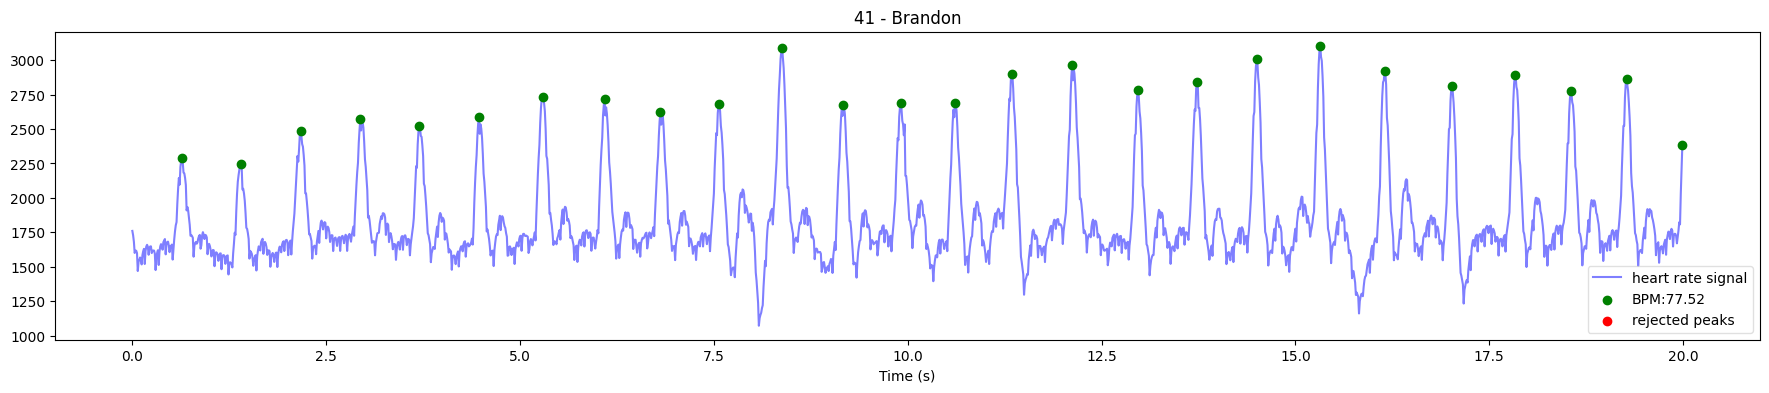

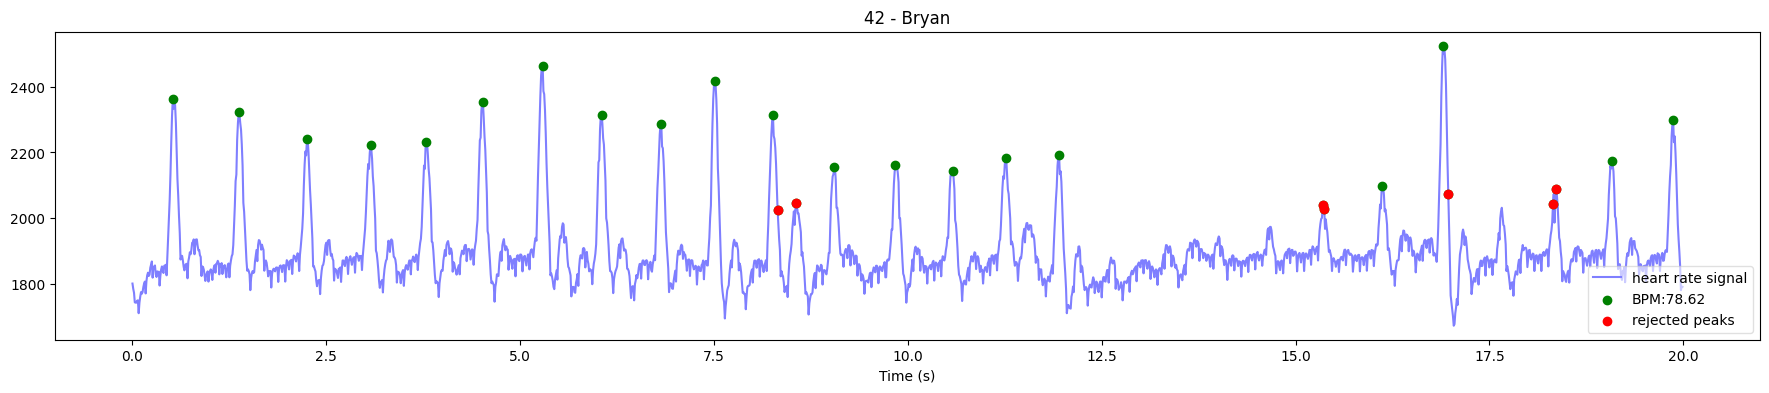

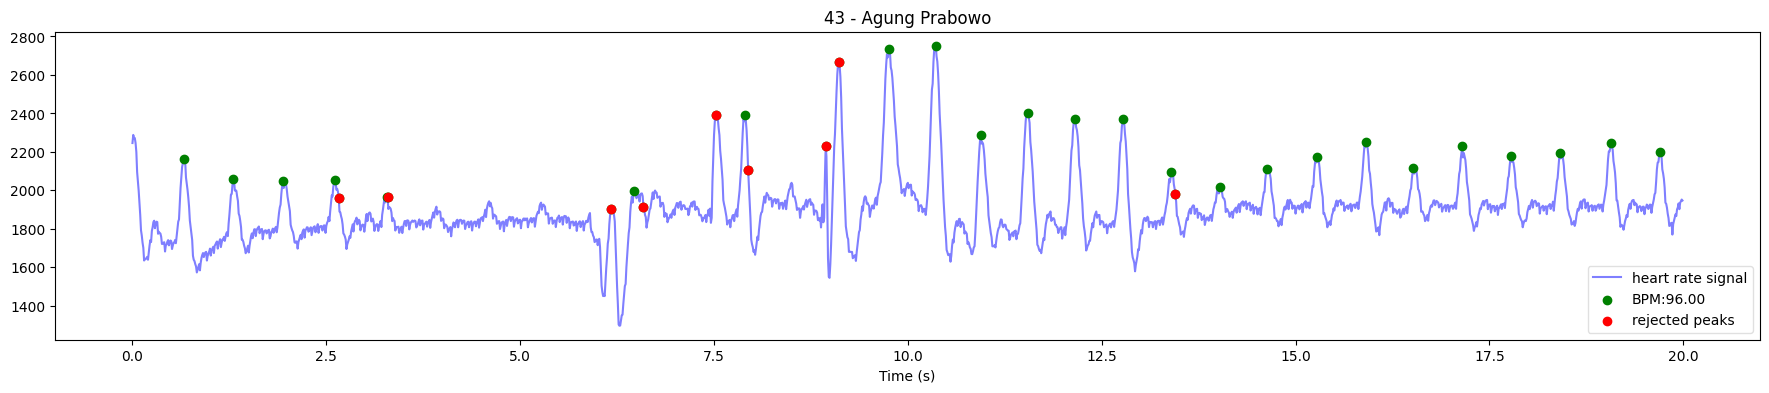

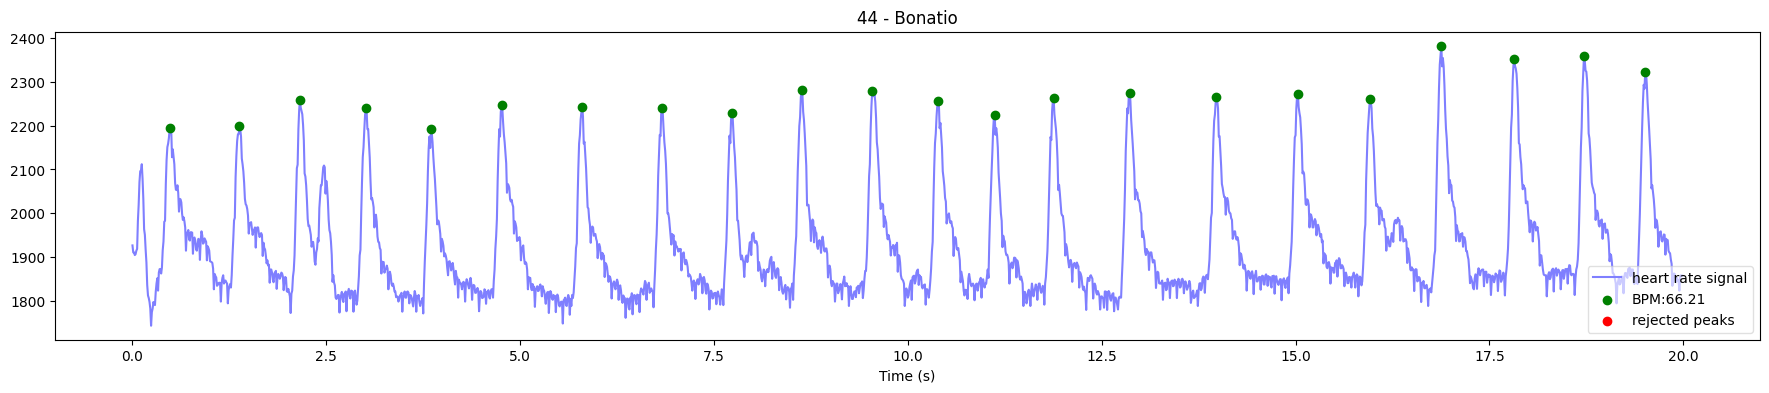

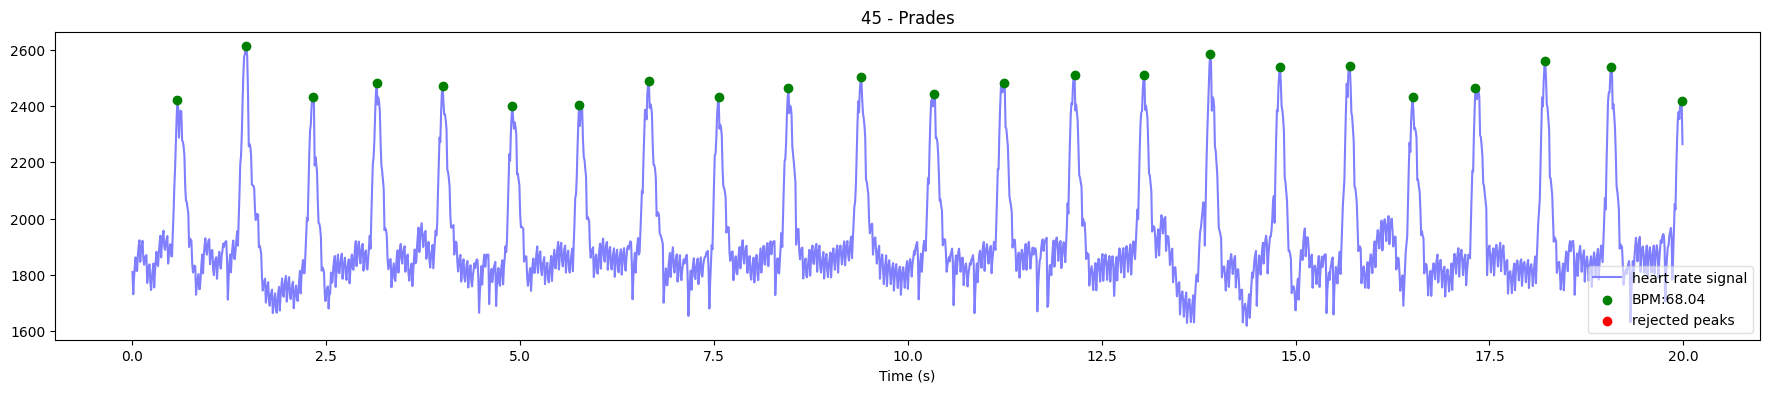

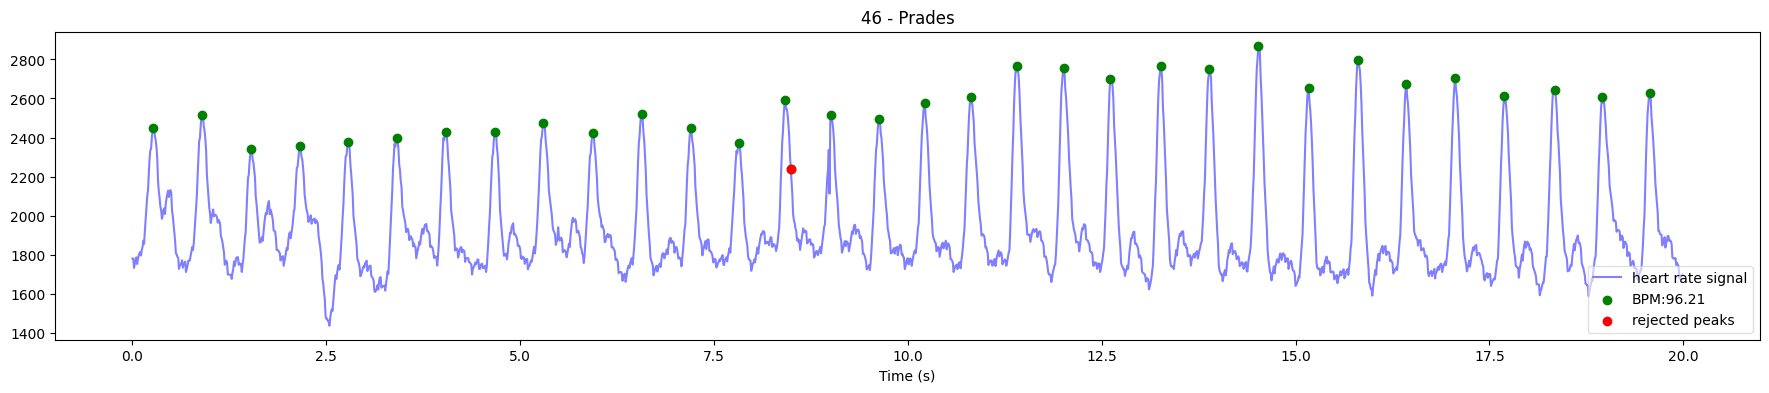

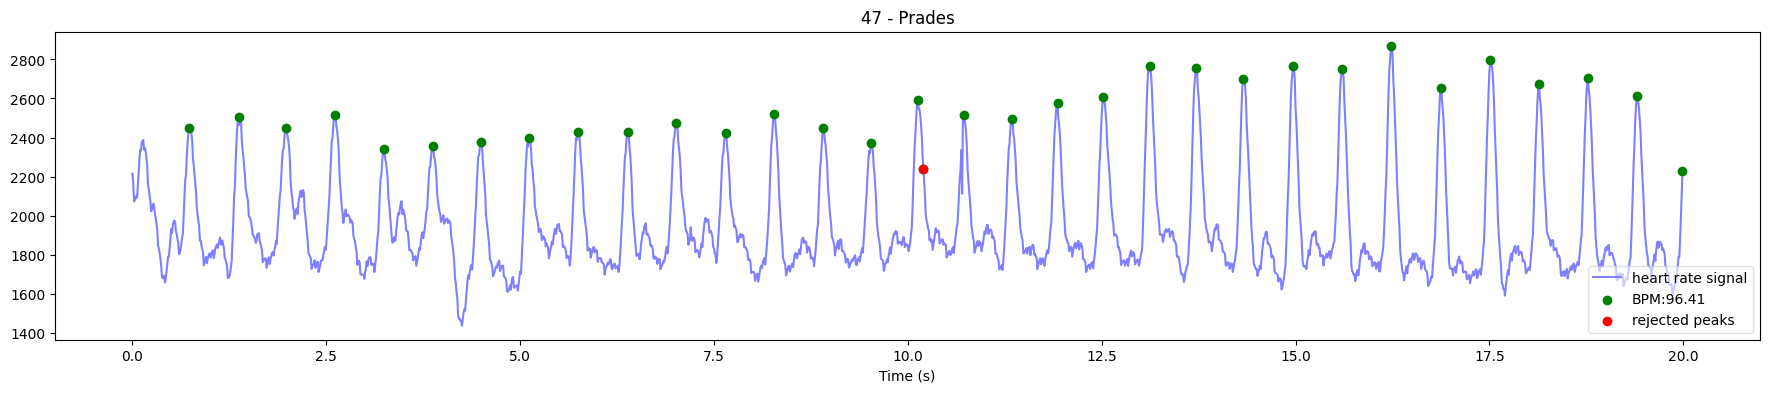

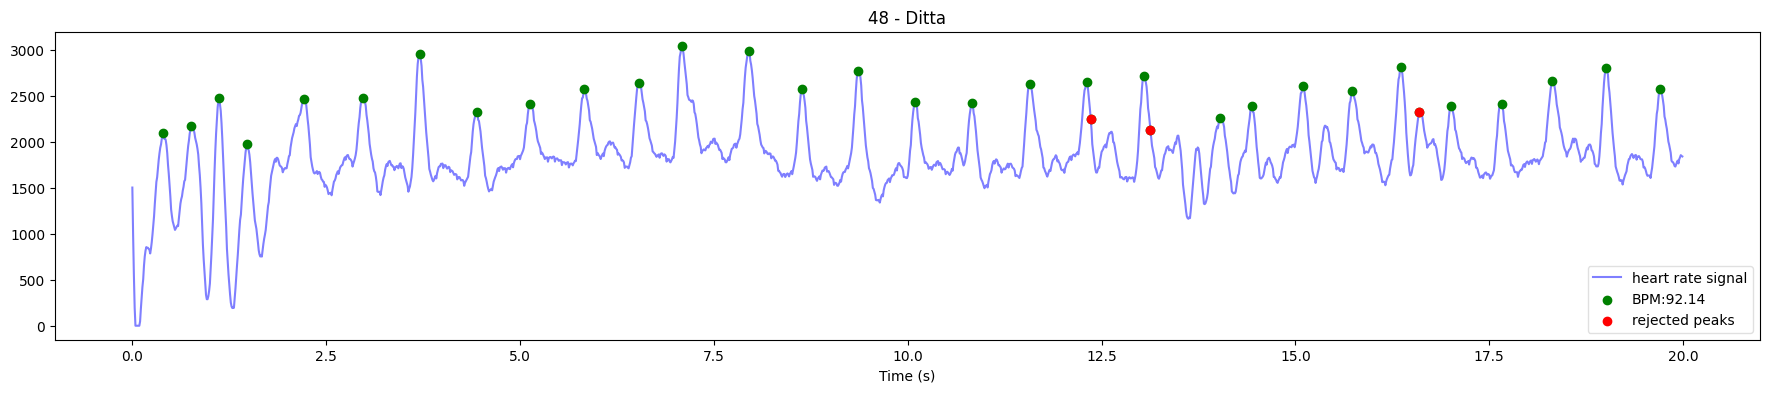

In [3]:
data = pd.read_csv('data-raw.csv')


for i, ppg in enumerate(data['ppg']): 
  try:
    ppg = list(map(int, ppg.split(',')))
    wd, m = hp.process(np.array(ppg), sample_rate = 100.0)
    hp.plotter(wd, m, figsize=(22,4), title=f"{i} - {data['name'][i]}")
    plt.show()
  except Exception as e:
    print(f"Error: {i}; ppg: {data['ppg'][i]}")

# buang ppg jelek

In [5]:
data = pd.read_csv('data-raw.csv')

bad_ppg_index = [0,3,5,6,8,9,10,11,12,13,14,15,16,17,18,20,21,27,29,30,31,34,35,36,37,39,40,43,44,45,46,47,48,49,50,51,52,57,58,59,63,64,65,67,68,69,70]
print(len(bad_ppg_index))
data_no_bad_ppg = data.drop(bad_ppg_index)
data_no_bad_ppg_and_no_null = data_no_bad_ppg.dropna(subset=["age","weight","ppg"])

data_no_bad_ppg_and_no_null.to_csv('data-clean.csv', index=False)

47


# cek lagi sinyal

c:\Python310\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


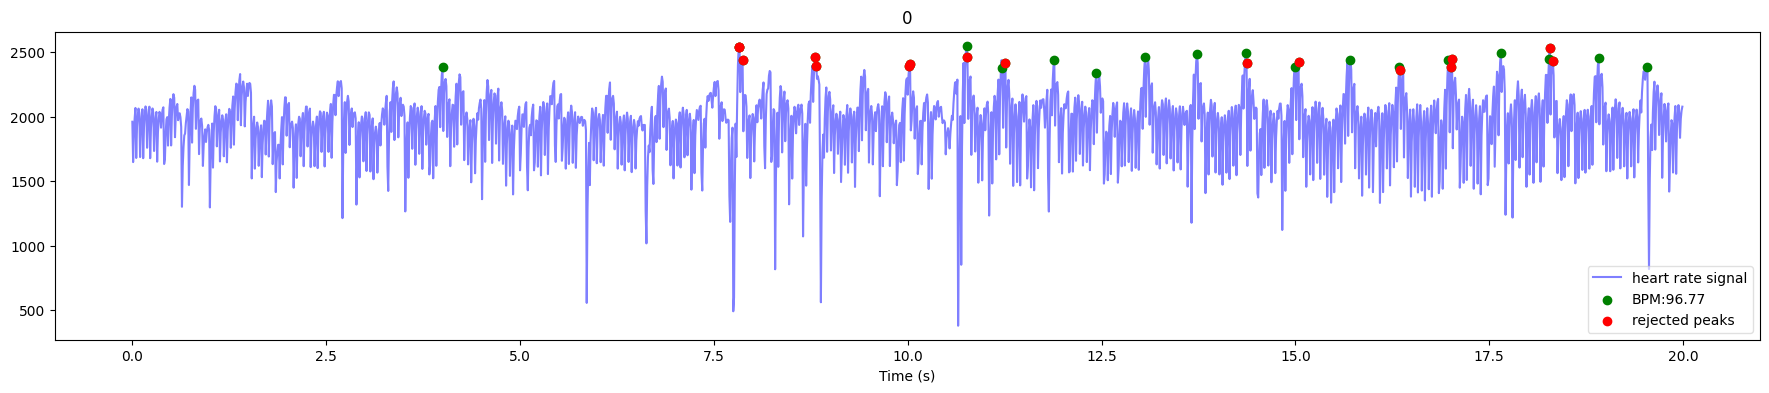

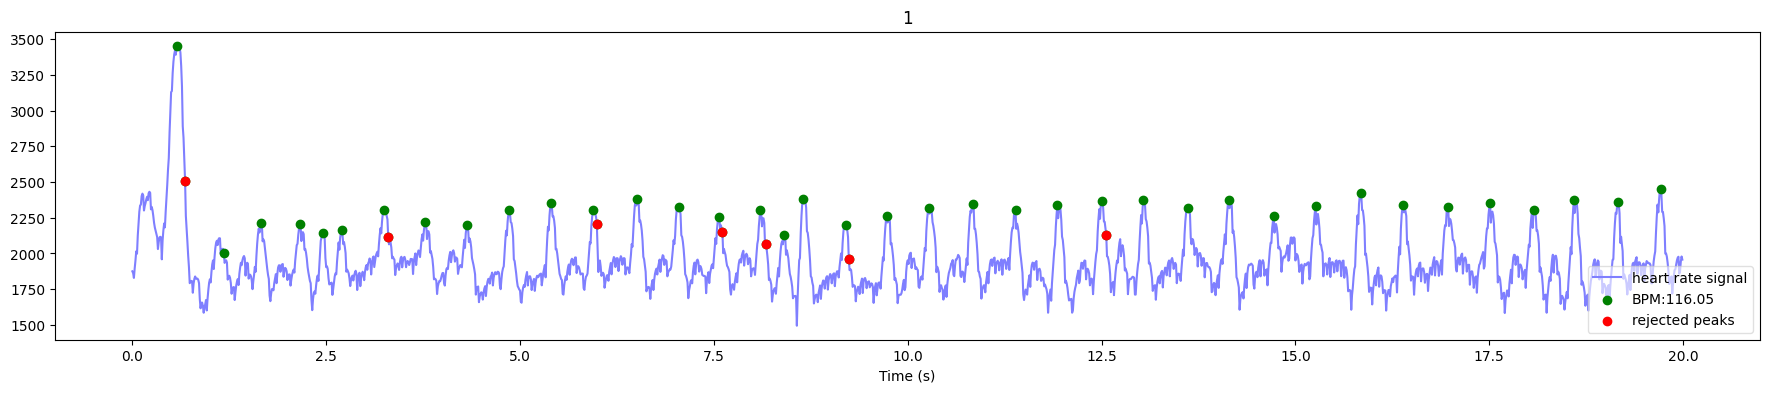

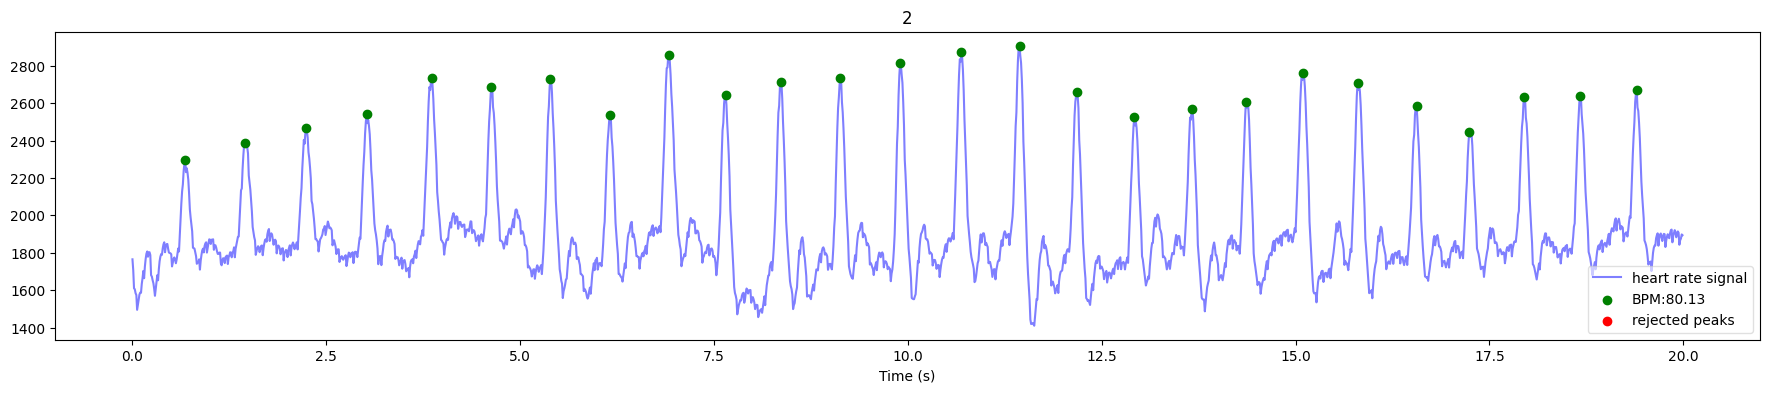

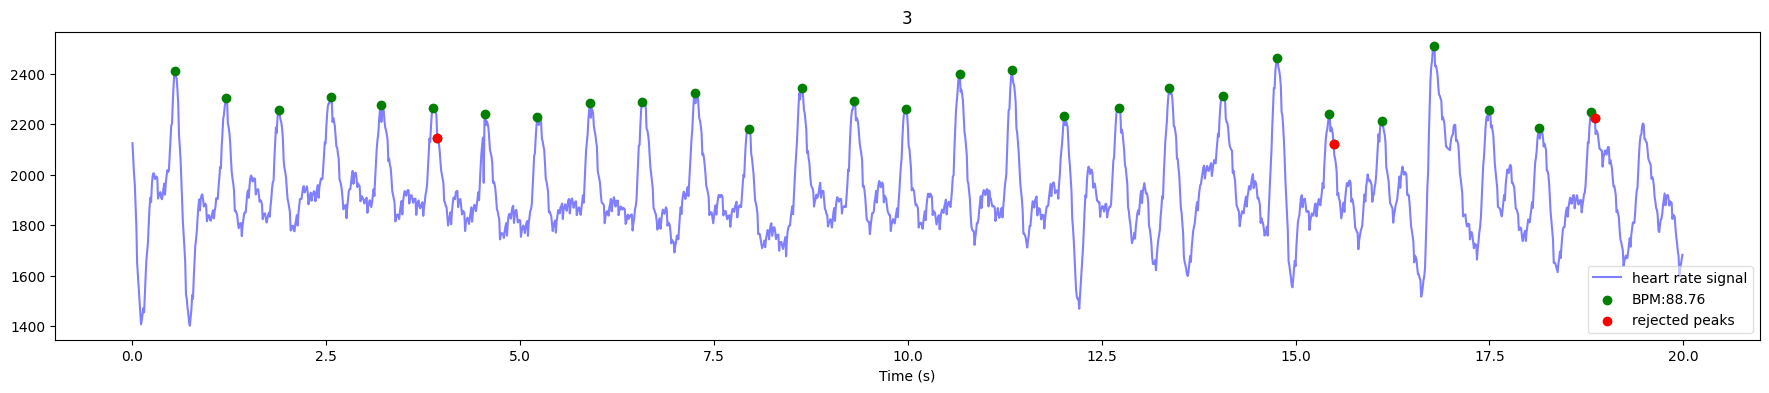

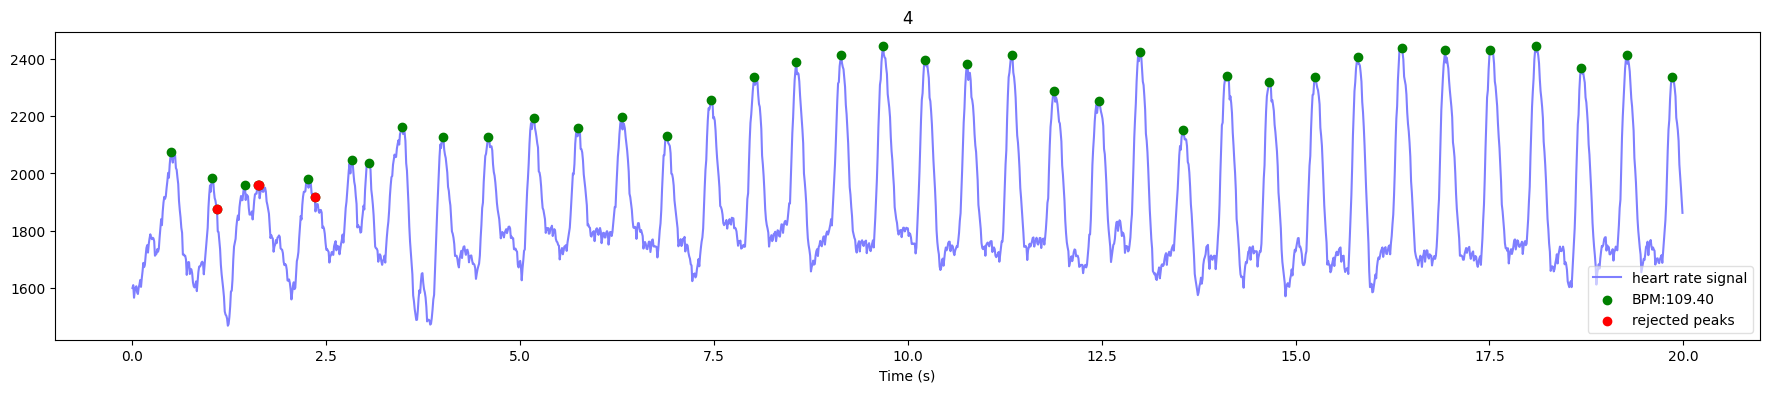

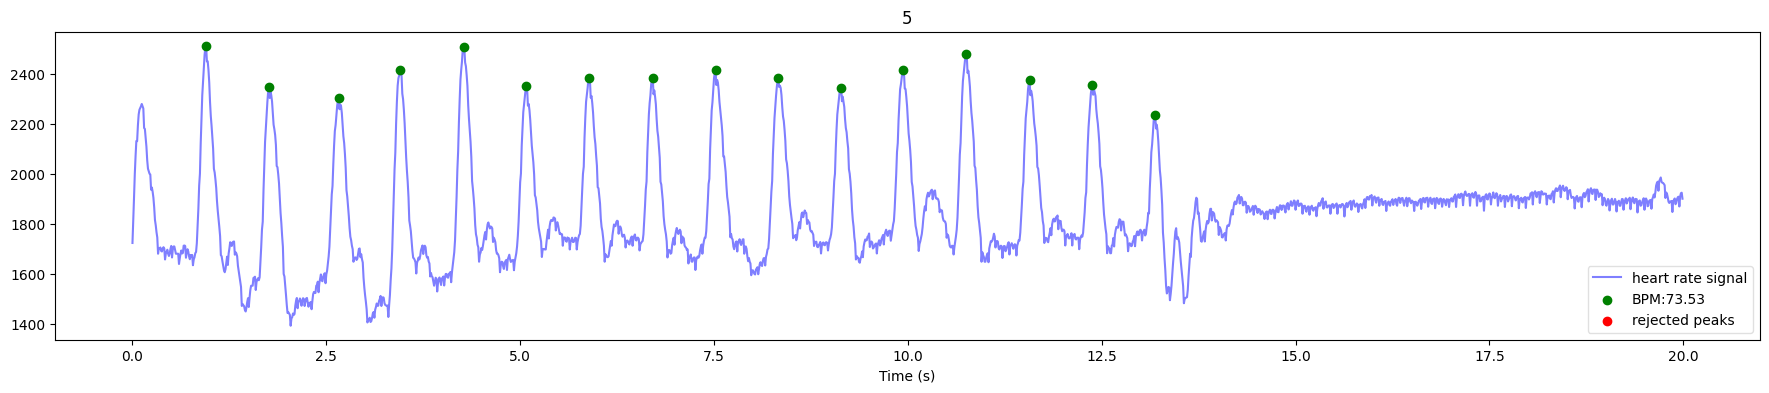

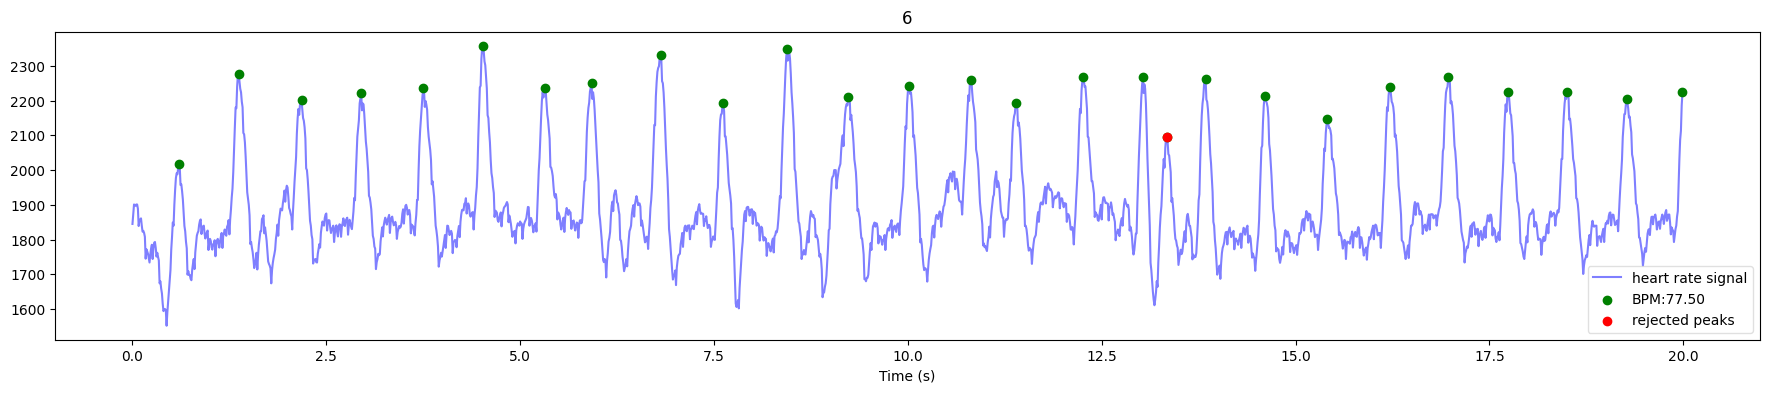

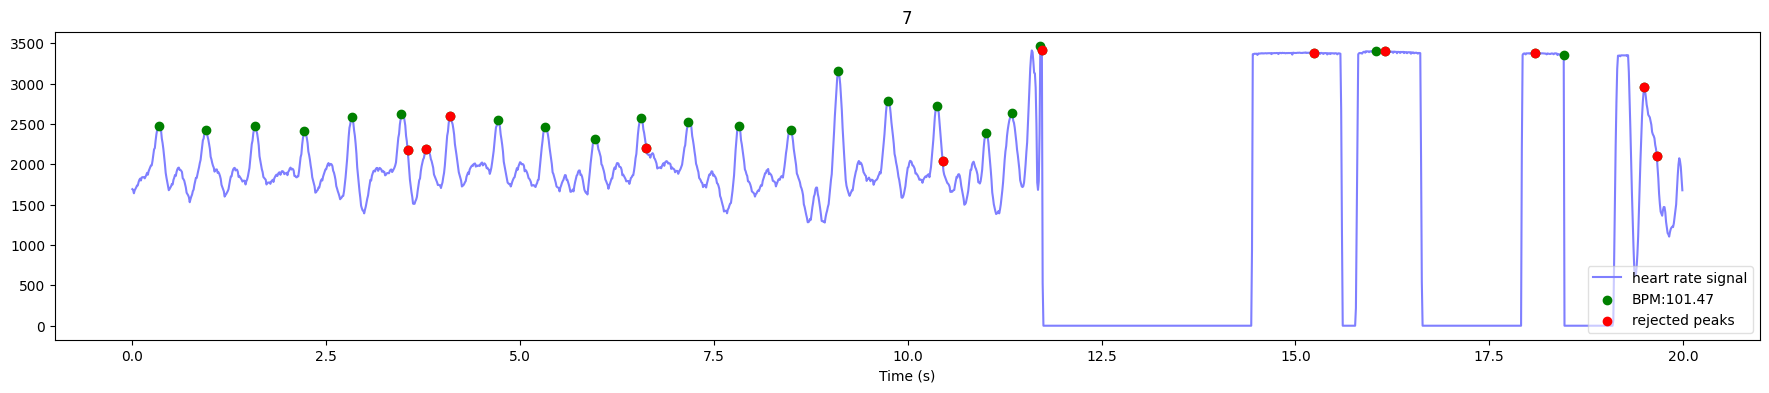

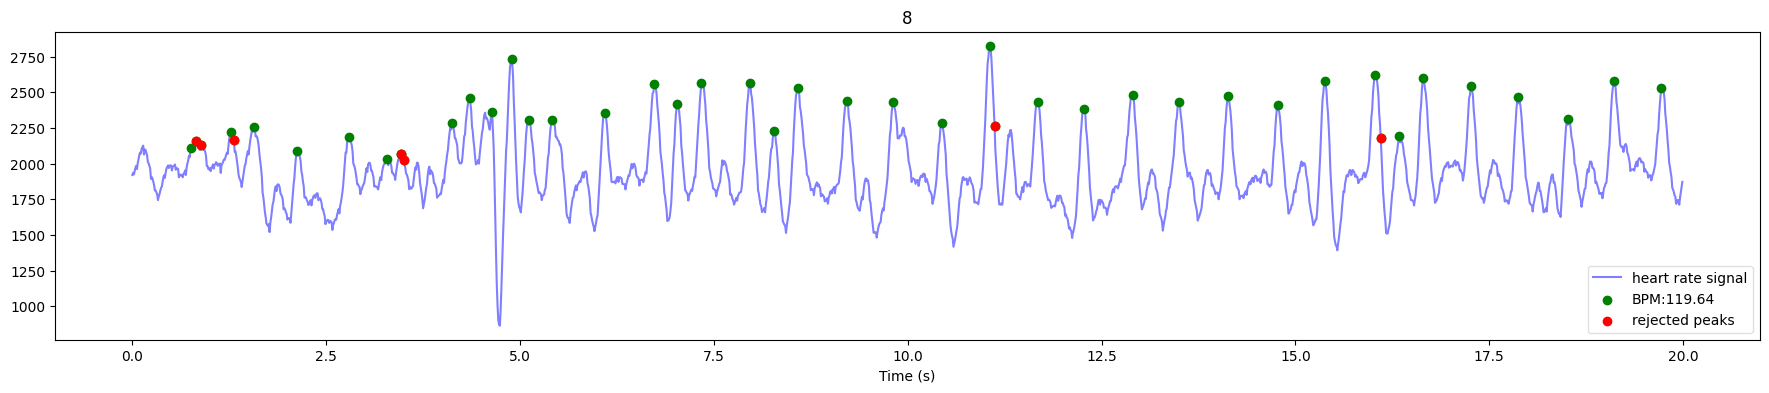

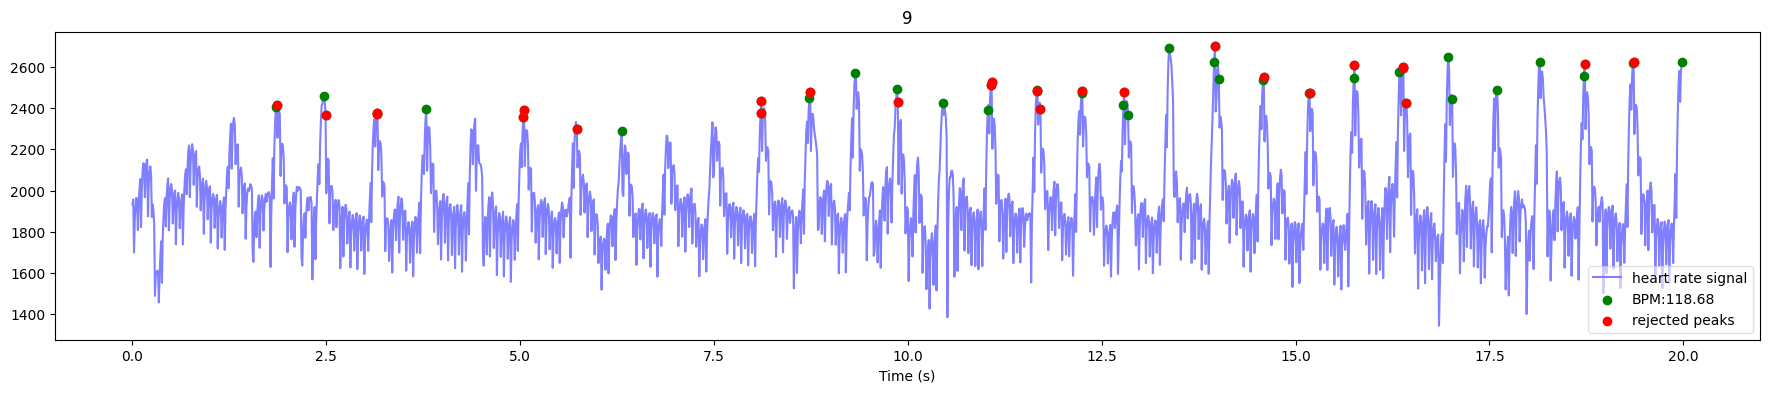

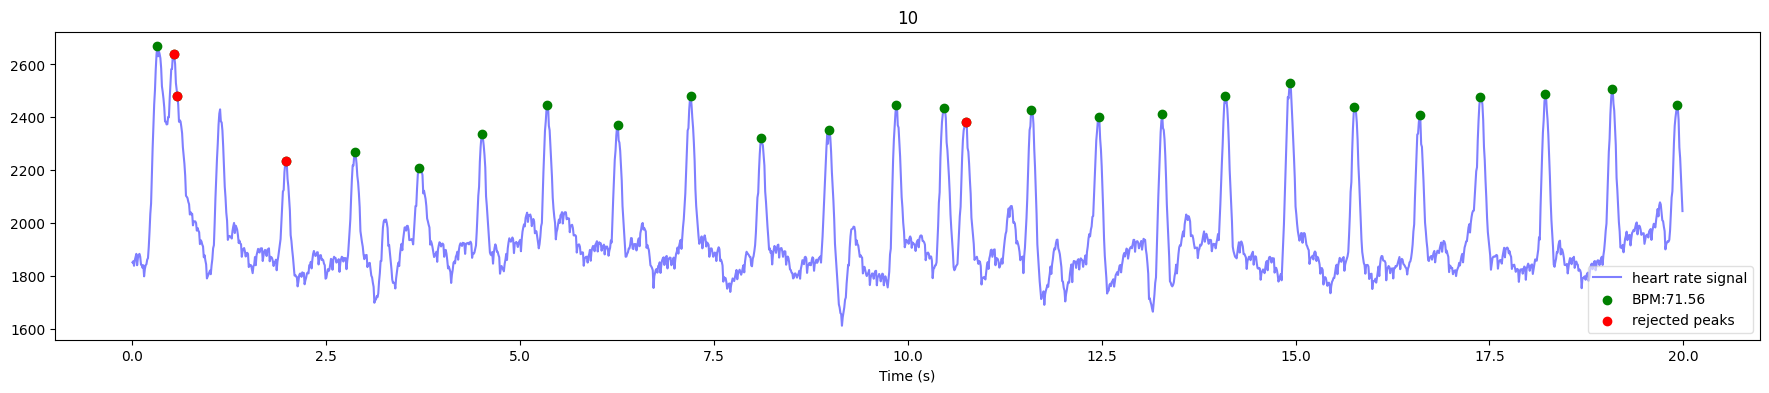

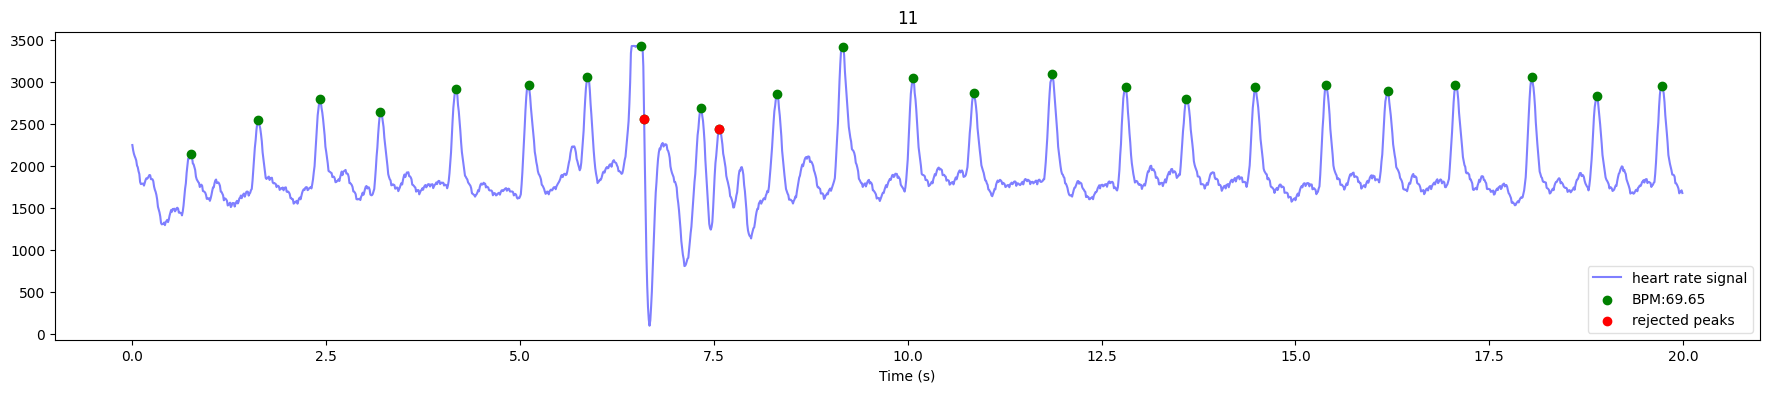

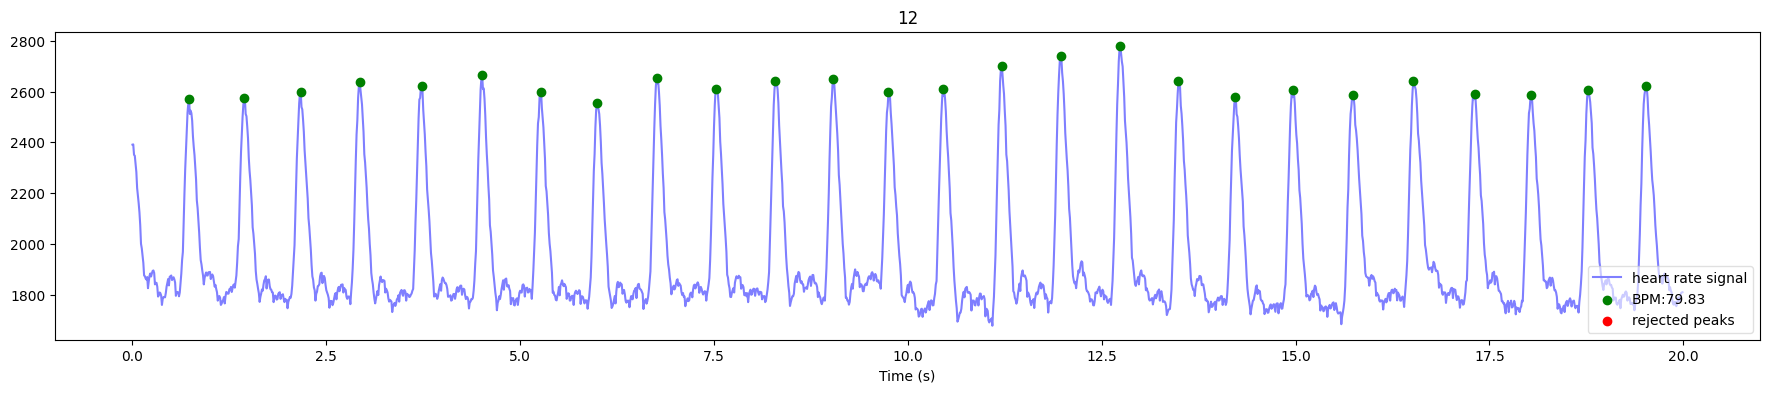

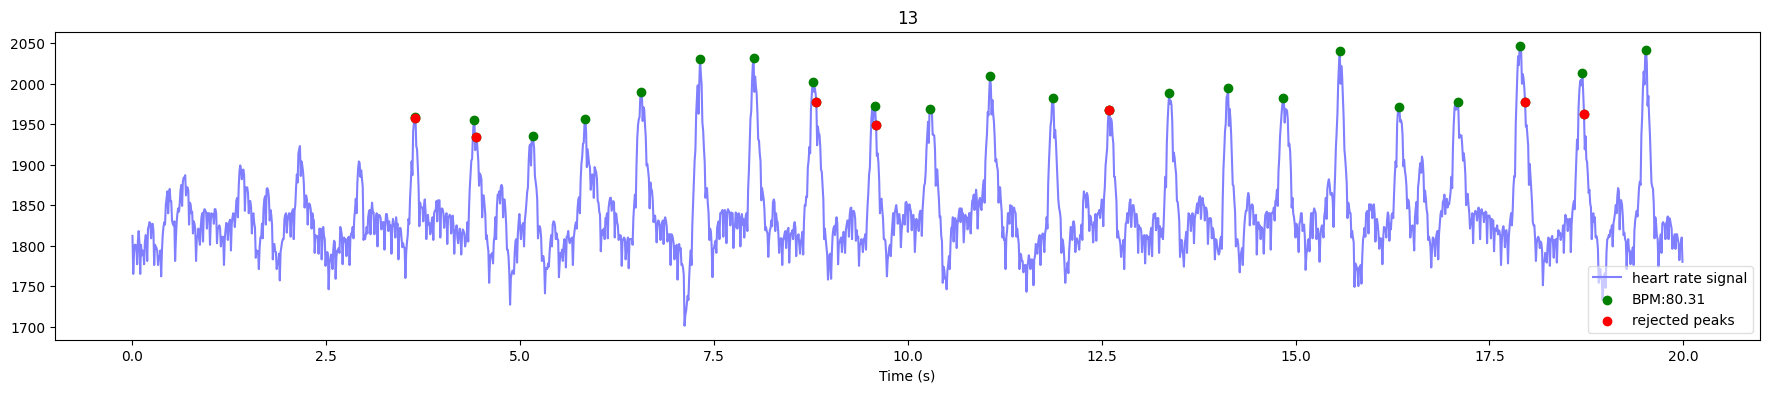

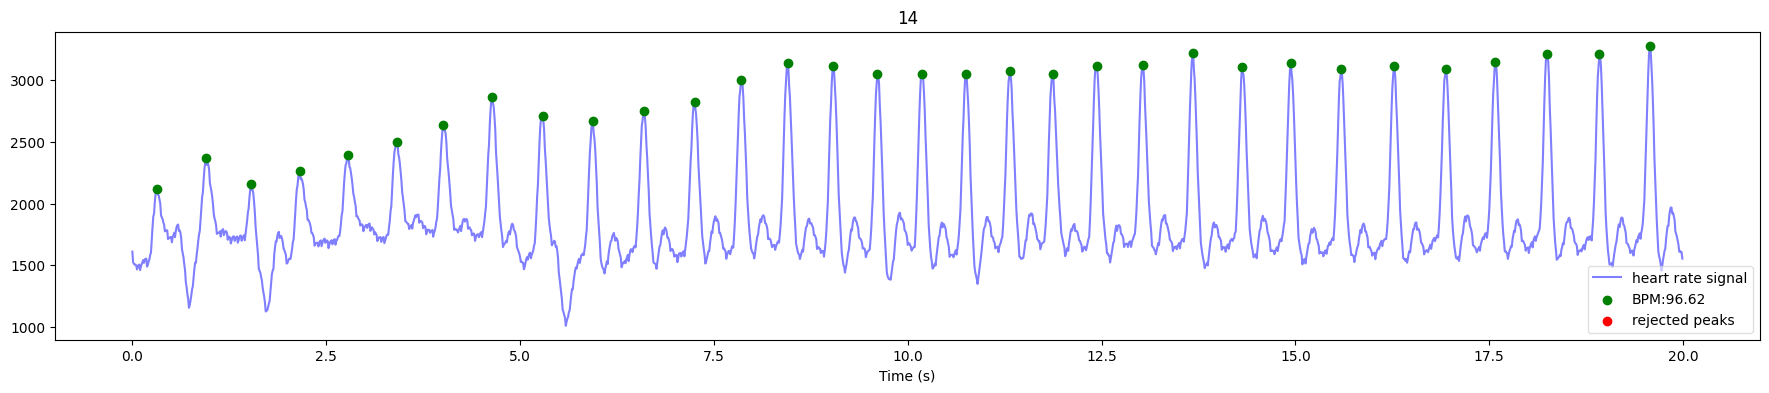

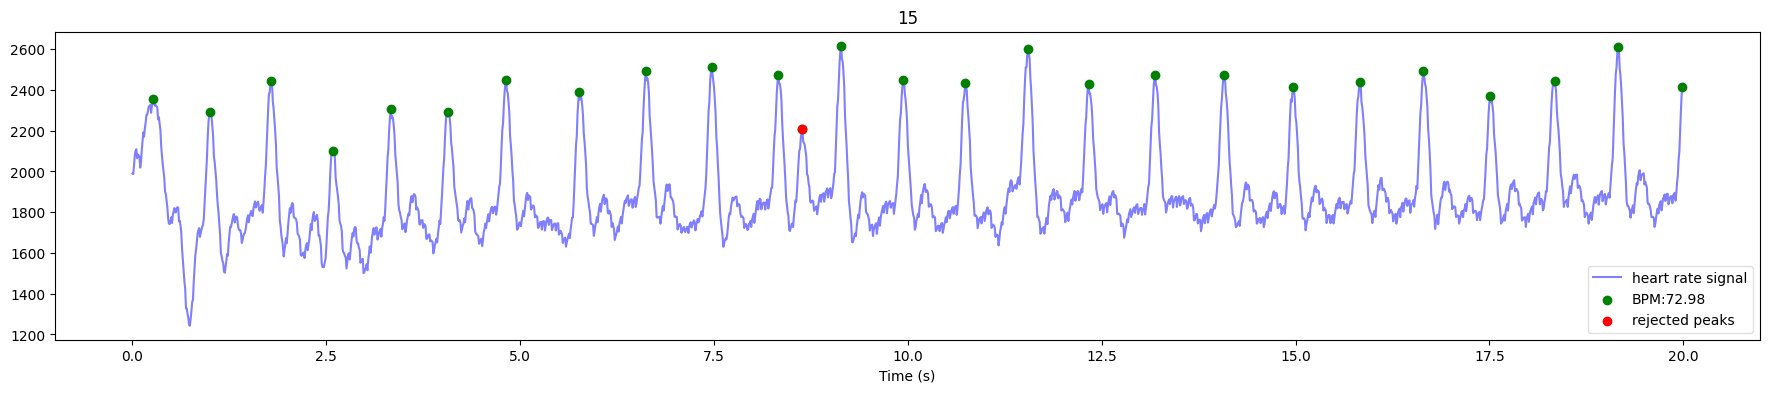

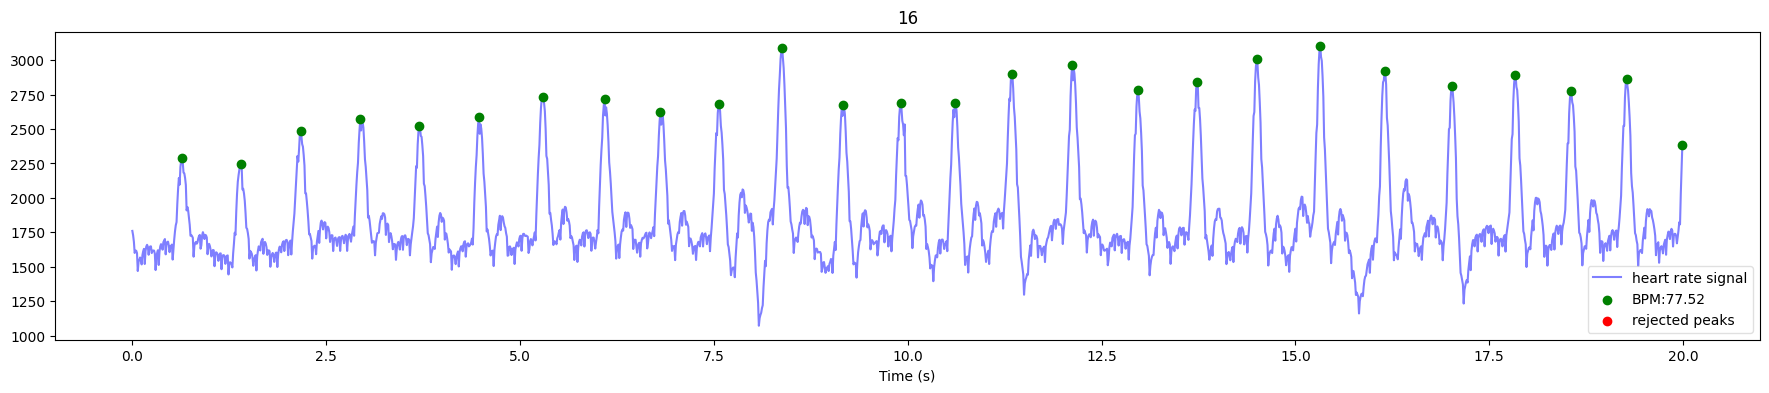

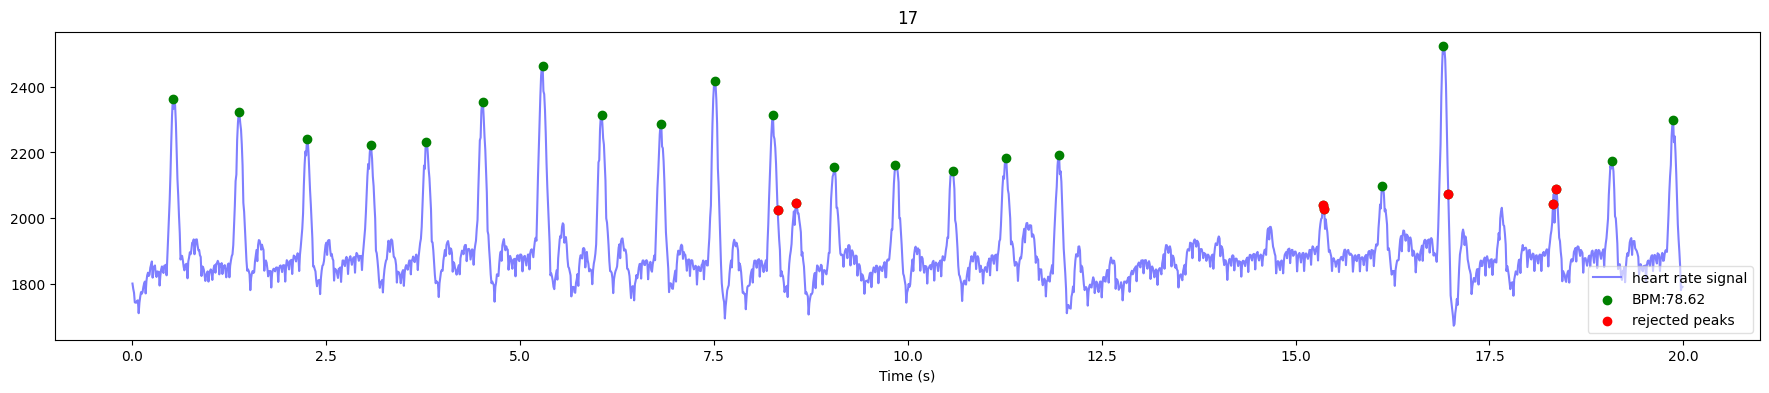

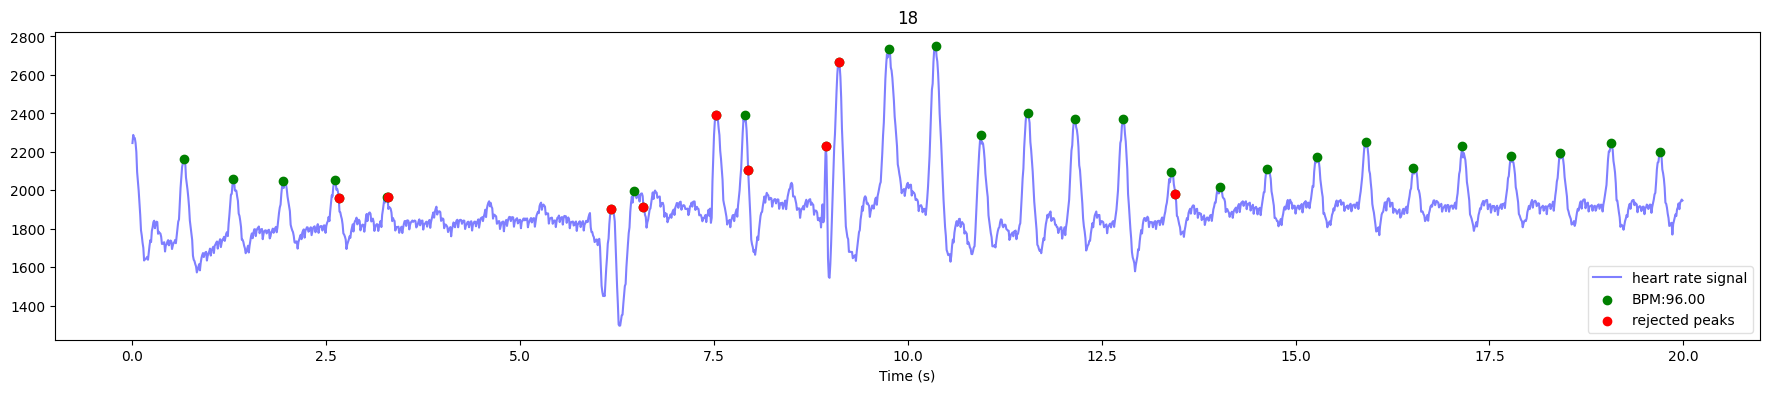

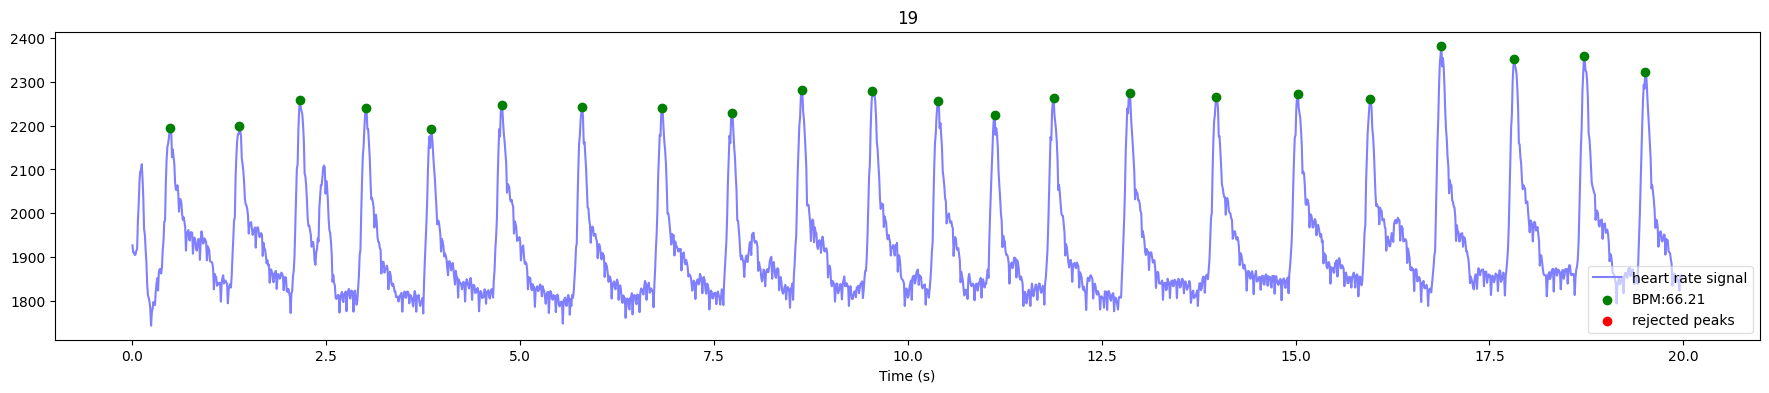

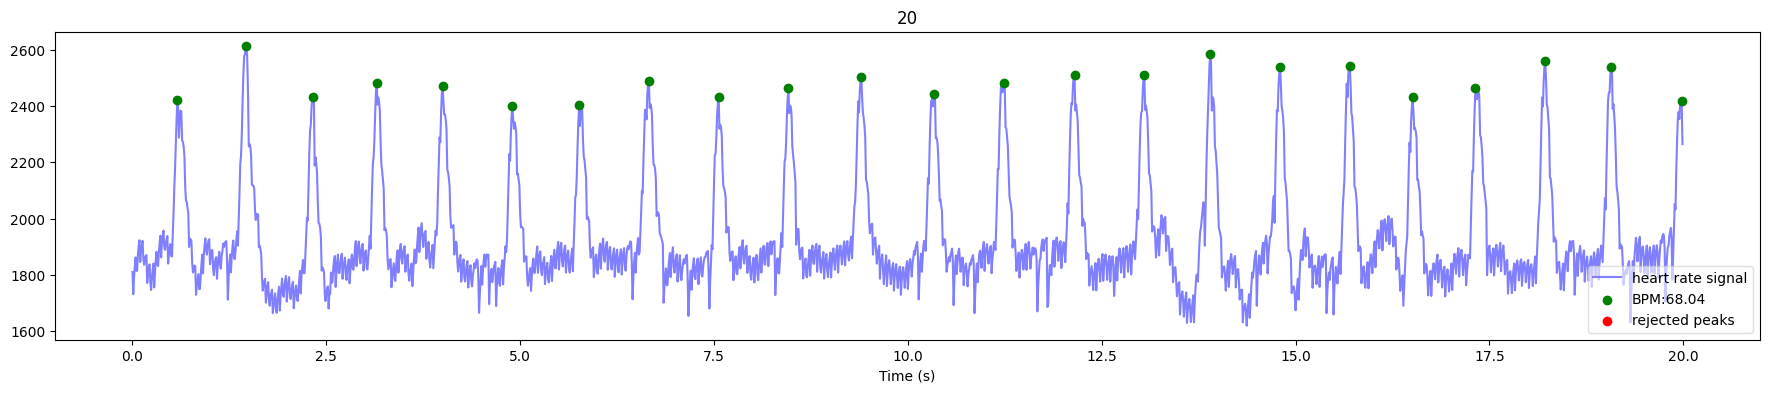

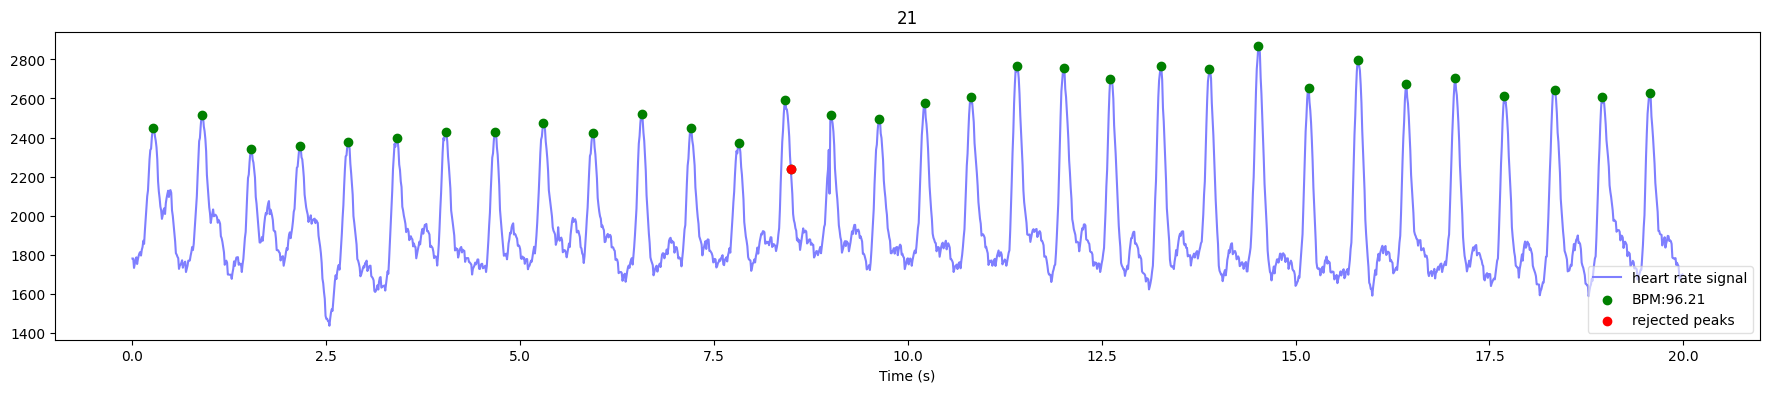

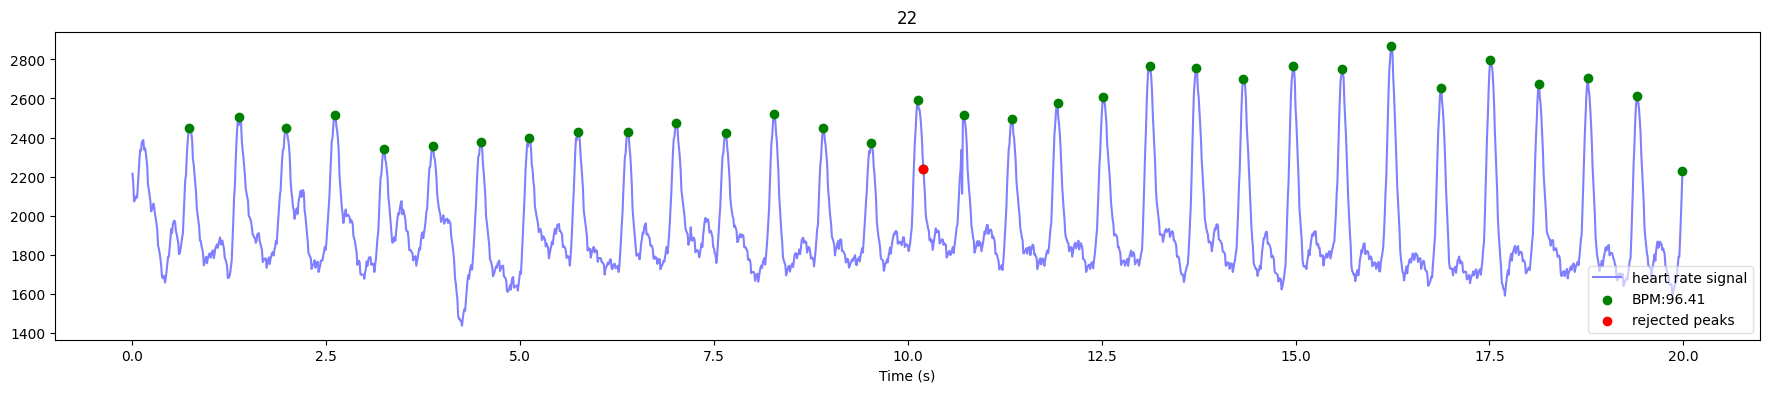

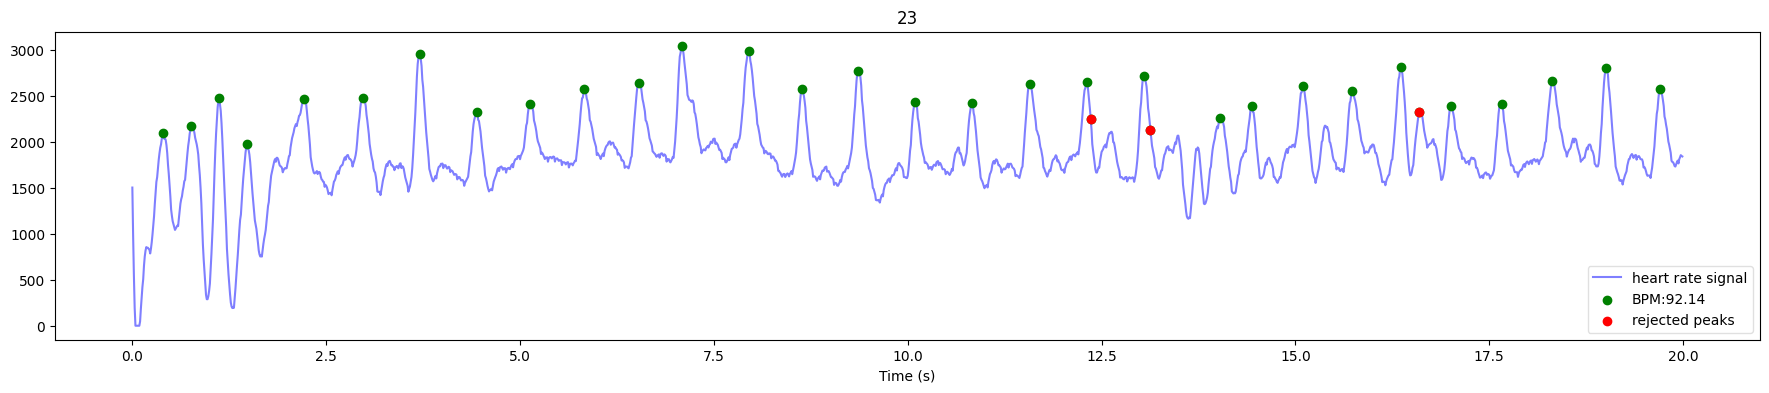

In [6]:
data = pd.read_csv('data-clean.csv')


for i, ppg in enumerate(data['ppg']): 
  try:
    ppg = list(map(int, ppg.split(',')))
    wd, m = hp.process(np.array(ppg), sample_rate = 100.0)
    hp.plotter(wd, m, figsize=(22,4), title=i)
    plt.show()
  except Exception as e:
    print(f"Error: {i}; ppg: {data['ppg'][i]}")